**Dans cette première partie, nous nous intéresserons au réseau 0 et nous étudierons la centralité en termes d'importance de voisinage, en particulier la centralité du PageRank.**


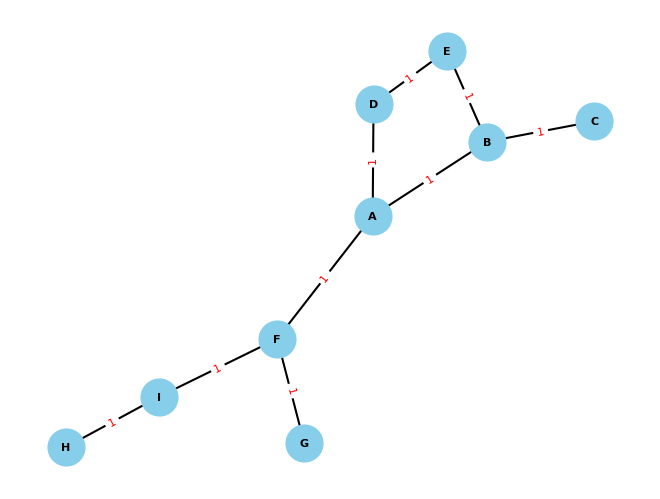

In [11]:
#Ce code permet de tracer d'abord le graphe du réseau 0

import networkx as nx
import matplotlib.pyplot as plt

# Créer un graphe non-orienté
G = nx.Graph()

# Ajouter les noeuds
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
G.add_nodes_from(nodes)

# Ajouter les arc de poids 1
edges = [('A', 'B'), ('A', 'D'), ('A', 'F'),
         ('B', 'C'), ('B', 'E'),
         ('D', 'E'),
         ('F', 'G'), ('F', 'I'),
         ('I', 'H')]

G.add_edges_from(edges)

# Tracer le graphe
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8, font_color='black', width=1.5)
edge_labels = {(i, j): 1 for i, j in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

plt.show()


**1-a-i) Dans cette sous-partie, nous implémentons la méthode des puissances pour calculer la centralité du PageRank des différents noeuds pour $\alpha$ = 1 et $\beta$ = 0.**

In [12]:
# Dans ce code, nous implémentons la méthode des puissances et l'applicant au réseau 0 pour calculer les valuers du PageRank pour alpha vaut 1 et beta vaut 0

import numpy as np
from prettytable import PrettyTable

# Create the graph
G = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
edges = [('A', 'B'), ('A', 'D'), ('A', 'F'),
         ('B', 'C'), ('B', 'E'),
         ('D', 'E'),
         ('F', 'G'), ('F', 'I'),
         ('I', 'H')]
G.add_nodes_from(nodes)
G.add_edges_from(edges)

n = len(nodes)
A = nx.adjacency_matrix(G)
M = A / A.sum(axis=1) # M est la normalisation de la matrice d'adjacence A pour que la somme de chaque ligne vaut 1


alpha = 1
beta = 0

pagerank_vector = np.ones((n, 1)) / n

# Créer un tableau pour stocker les valeurs du Pagerank à chaque itération
table = PrettyTable()
table.field_names = ['Itération'] + nodes

# Nous avons décidé d'aller jusqu'à l'itération 80
for iteration in range(1, 81):
    pagerank_vector = alpha * M @ pagerank_vector + beta * (1 / n)

    # Ajouter une ligne au tableau
    row_values = [iteration] + [f'{pagerank_vector[i, 0]:.6f}' for i in range(n)]
    table.add_row(row_values)


print(table)

+-----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| Itération |    A     |    B     |    C     |    D     |    E     |    F     |    G     |    H     |    I     |
+-----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
|     1     | 0.129630 | 0.203704 | 0.037037 | 0.092593 | 0.092593 | 0.203704 | 0.037037 | 0.055556 | 0.148148 |
|     2     | 0.182099 | 0.126543 | 0.067901 | 0.089506 | 0.114198 | 0.154321 | 0.067901 | 0.074074 | 0.123457 |
|     3     | 0.138374 | 0.185700 | 0.042181 | 0.117798 | 0.086934 | 0.190329 | 0.051440 | 0.061728 | 0.125514 |
|     4     | 0.184242 | 0.131773 | 0.061900 | 0.089592 | 0.120799 | 0.160322 | 0.063443 | 0.062757 | 0.125171 |
|     5     | 0.142161 | 0.183713 | 0.043924 | 0.121814 | 0.088720 | 0.187443 | 0.053441 | 0.062586 | 0.116198 |
|     6     | 0.184626 | 0.135671 | 0.061238 | 0.091747 | 0.122145 | 0.158927 | 0.062481 | 0.058

**1-a-ii) Dans cette sous-partie, nous utilisons l'expression algébrique pour calculer la centralité du PageRank des différents noeuds pour  α  = 0.85 et  β  = 1.**

In [13]:
import networkx as nx
import numpy as np


# Créer de nouveau le graphe du réseau 0
G = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
edges = [('A', 'B'), ('A', 'D'), ('A', 'F'),
         ('B', 'C'), ('B', 'E'),
         ('D', 'E'),
         ('F', 'G'), ('F', 'I'),
         ('I', 'H')]
G.add_nodes_from(nodes)
G.add_edges_from(edges)


A = nx.adjacency_matrix(G) # A est la matrice d'adjacence du graphe G
D = np.diag(list(dict(G.degree()).values())) # D est la matrice diagonale qui contient les dégrés de chaque noeud du graphe G


beta = 1

alpha = 0.85

I = np.eye(len(nodes)) # Matrice identité


M = np.linalg.inv(I - alpha * (np.transpose(A) @ np.linalg.inv(D)))
P = beta * M

pagerank_vector = []

for i in range (len(nodes)):
  S = 0
  for j in range (len(nodes)):
    S += P[i][j]
  pagerank_vector.append(S)

i=0
for node in nodes:
  print (node, ":", pagerank_vector[i])
  i = i+1


A : 9.15056407483829
B : 9.397704812491918
C : 3.6626830302060434
D : 6.284424236816782
E : 6.333563330853176
F : 9.942355567006281
G : 3.817000743985113
H : 4.105245113414751
I : 7.306459090387651


**1-a-iii) Ensuite, nous utilisons la même méthode et donc le même code pour calculer la centralité du PageRank des différents noeuds pour  α  = 0 et  β  = 1.**

In [14]:
import networkx as nx
import numpy as np


# Créer de nouveau le graphe du réseau 0
G = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
edges = [('A', 'B'), ('A', 'D'), ('A', 'F'),
         ('B', 'C'), ('B', 'E'),
         ('D', 'E'),
         ('F', 'G'), ('F', 'I'),
         ('I', 'H')]
G.add_nodes_from(nodes)
G.add_edges_from(edges)


A = nx.adjacency_matrix(G) # A est la matrice d'adjacence du graphe G
D = np.diag(list(dict(G.degree()).values())) # D est la matrice diagonale qui contient les dégrés de chaque noeud du graphe G


beta = 1

alpha = 0

I = np.eye(len(nodes)) # Matrice identité


M = np.linalg.inv(I - alpha * (np.transpose(A) @ np.linalg.inv(D)))
P = beta * M

pagerank_vector = []

for i in range (len(nodes)):
  S = 0
  for j in range (len(nodes)):
    S += P[i][j]
  pagerank_vector.append(S)

i=0
for node in nodes:
  print (node, ":", pagerank_vector[i])
  i = i+1

A : 1.0
B : 1.0
C : 1.0
D : 1.0
E : 1.0
F : 1.0
G : 1.0
H : 1.0
I : 1.0


**1-d) 1-e) Dans ce code, nous implémentons une fonction qui prend comme paramètres un graphe G, $\alpha$ et $\beta$, et fournit en sortie les valeurs du PageRank des noeuds du graphe G. Ensuite nous l'appliquons au réseau 0 pour $\alpha$ = 0.85 et $\beta$ = 0.5**

In [15]:
import networkx as nx
import numpy as np

def calculer_pagerank(graph, alpha, beta):
    nodes = list(graph.nodes)
    A = nx.adjacency_matrix(graph).toarray()
    D = np.diag(list(dict(graph.degree()).values()))
    I = np.eye(len(nodes))

    M = np.linalg.inv(I - alpha * (np.transpose(A) @ np.linalg.inv(D)))
    P = beta * M

    pagerank_vector = []

    for i in range(len(nodes)):
        S = 0
        for j in range(len(nodes)):
            S += P[i][j]
        pagerank_vector.append(S)

    return dict(zip(nodes, pagerank_vector))

# Application au réseau 0
G = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
edges = [('A', 'B'), ('A', 'D'), ('A', 'F'),
         ('B', 'C'), ('B', 'E'),
         ('D', 'E'),
         ('F', 'G'), ('F', 'I'),
         ('I', 'H')]
G.add_nodes_from(nodes)
G.add_edges_from(edges)

alpha = 0.85
beta = 0.5

pagerank_result = calculer_pagerank(G, alpha, beta)

for node, score in pagerank_result.items():
    print(f"{node}: {score}")



A: 4.575282037419145
B: 4.698852406245959
C: 1.8313415151030217
D: 3.142212118408391
E: 3.166781665426588
F: 4.9711777835031405
G: 1.9085003719925564
H: 2.0526225567073757
I: 3.6532295451938257


**2-a) Nous passons par la suite au calcul de la centralité d'intermédiartié des noeuds du réseau 0 et nous commençant par l'implémentation du code qui calcule le nombre de plus courts chemins entre deux noeuds d'un graphe**

In [16]:
# Nous utilisons l'algorithme de Djikstra pour trouver les plus courts chemins d'un noeud vers un autre noeud
import heapq

def dijkstra(graph, début, fin):
    # Initialisation
    distances = {node: float('infinity') for node in graph}
    distances[début] = 0
    count = {node: 0 for node in graph}
    count[début] = 1
    pq = [(0, début)]

    while pq:
        distance_actuelle, noeud_actuel = heapq.heappop(pq)

        # Ignore si la distance actuelle est plus grande que la distance déjà trouvée
        if distance_actuelle > distances[noeud_actuel]:
            continue

        # Exploration des voisins
        for voisin, poids in graph[noeud_actuel].items():
            distance = distance_actuelle + poids

            # Mettre à jour la distance minimale et le nombre de chemins
            if distance < distances[voisin]:
                distances[voisin] = distance
                count[voisin] = count[noeud_actuel]
                heapq.heappush(pq, (distance, voisin))
            elif distance == distances[voisin]:
                count[voisin] += count[noeud_actuel]

    return count[fin]

# Exemple d'utilisation
graph = {
    'A': {'B': 1, 'D': 1, 'F': 1},
    'B': {'A': 1, 'C': 1, 'E': 1},
    'C': {'B': 1},
    'D': {'A': 1, 'E': 1},
    'E': {'D': 1, 'B': 1},
    'F': {'A': 1, 'G': 1, 'I': 1},
    'G': {'F': 1},
    'H': {'I': 1},
    'I': {'H': 1, 'F': 1},
}

départ = 'D'
arrivée = 'B'
result = dijkstra(graph, départ, arrivée)

print(f"Le nombre de plus courts chemins entre {départ} et {arrivée} est : {result}")

Le nombre de plus courts chemins entre D et B est : 2


**2-b) Le code suivant permet de calculer les nombre des plus courts chemins d'un noeud vers un autre noeud en passant par un noeud donné, et nous l'appliquons au réseau 0**

In [17]:
# Nous utilisons l'algorithme de Djikstra pour déterminer les plus courts chemins

import heapq

def dijkstra_avec_chemin(graph, début, fin):
    # Initialisation
    distances = {node: float('infinity') for node in graph}
    distances[début] = 0
    compte = {node: 0 for node in graph}
    compte[début] = 1
    chemins = {node: [] for node in graph}
    pq = [(0, début)]

    while pq:
        distance_actuelle, noeud_actuel = heapq.heappop(pq)

        # Ignore si la distance actuelle est plus grande que la distance déjà trouvée
        if distance_actuelle > distances[noeud_actuel]:
            continue

        # Exploration des voisins
        for voisin, poids in graph[noeud_actuel].items():
            distance = distance_actuelle + poids

            # Mettre à jour la distance minimale, le nombre de chemins, et les chemins
            if distance < distances[voisin]:
                distances[voisin] = distance
                compte[voisin] = compte[noeud_actuel]
                chemins[voisin] = chemins[noeud_actuel] + [noeud_actuel]
                heapq.heappush(pq, (distance, voisin))
            elif distance == distances[voisin]:
                compte[voisin] += compte[noeud_actuel]
                chemins[voisin].extend(chemins[noeud_actuel] + [noeud_actuel])

    n = len(chemins)

    # Retourner le nombre de plus courts chemins et les chemins eux-mêmes
    return compte[fin], chemins[fin] if distances[fin] != float('infinity') else []

# Exemple d'utilisation: réseau 0
graph = {
    'A': {'B': 1, 'D': 1, 'F': 1},
    'B': {'A': 1, 'C': 1, 'E': 1},
    'C': {'B': 1},
    'D': {'A': 1, 'E': 1},
    'E': {'D': 1, 'B': 1},
    'F': {'A': 1, 'G': 1, 'I': 1},
    'G': {'F': 1},
    'H': {'I': 1},
    'I': {'H': 1, 'F': 1},
}

départ = 'D'
arrivée = 'B'
compte_résultant, chemins_résultants = dijkstra_avec_chemin(graph, départ, arrivée)

print(f"Le nombre de plus courts chemins entre {départ} et {arrivée} est : {compte_résultant}")
print(f"Les chemins eux-mêmes sont : {chemins_résultants}")

# Etant donné les chemins obtenus par l'algorithme de Djikstra, nous cherchons les chemins qui contiennent le noeud de passage qu'on veut

def extraire_chemins_avec_noeud_donné(lst, départ, noeud):
    sublists = []
    current_sublist = []
    S = 0
    for element in lst:
        current_sublist.append(element)

        if element == départ:
            if current_sublist[:-1]:
                sublists.append(current_sublist[:-1])
            current_sublist = [element]

    if current_sublist:  # Add the last sublist if it's not empty
        sublists.append(current_sublist)

    for sublist in sublists:
      if noeud in sublist:
        S += 1

    return S

# Exemple d'utilisation
liste_des_chemins = chemins_résultants
target_element = 'D'
noeud = 'A'
nombre_chemin_passant_par_vertex = extraire_chemins_avec_noeud_donné(liste_des_chemins, target_element, noeud)

print("Nombre des plus courts chemin de", départ, "vers", arrivée, "passant par", noeud, "est: ",nombre_chemin_passant_par_vertex)





Le nombre de plus courts chemins entre D et B est : 2
Les chemins eux-mêmes sont : ['D', 'A', 'D', 'E']
Nombre des plus courts chemin de D vers B passant par A est:  1


**2-c) 2-d) Après avoir implémenté les deux codes qui donnent le nombre dees plus courts chemins entre deux noeuds et le nombre des plus courts chemins entre deux noeuds passant par un noeud donné, nous possédons tous les ingrédients pour implémenter le code qui calcule la centralité d'intermédiarité des noeuds d'un graphe.**

In [18]:
# Algorithme de calcul de centralité d'intermédiarité


def betweenness_centrality(graph):
    score_centralité = {node: 0 for node in graph}
    noeuds = list(graph.keys())
    n = len(noeuds)

    # Calculer la centralité d'intermédiarité pour chaque paire de nœuds (s, t)
    for node in graph:
        for départ in graph:
            for arrivée in graph:
                if départ != arrivée and départ != node and arrivée != node:
                    # Nombre de plus courts chemins entre départ et arrivée
                   resultat = dijkstra(graph, départ, arrivée)

                   compte_résultant, chemins_resultants = dijkstra_avec_chemin(graph, départ, arrivée)


                    # Nombre de plus courts chemins entre départ et arrivée passant par le nœud 'node'
                   chemins_par_noeud = extraire_chemins_avec_noeud_donné(chemins_resultants, départ, node)

                    # Ajouter la contribution du nœud 'node' à la centralité d'intermédiarité
                   score_centralité[node] += chemins_par_noeud / (resultat * (n-1) * (n-2))

    return score_centralité

# Exemple d'utilisation: réseau 0
graph = {
    'A': {'B': 1, 'D': 1, 'F': 1},
    'B': {'A': 1, 'C': 1, 'E': 1},
    'C': {'B': 1},
    'D': {'A': 1, 'E': 1},
    'E': {'D': 1, 'B': 1},
    'F': {'A': 1, 'G': 1, 'I': 1},
    'G': {'F': 1},
    'H': {'I': 1},
    'I': {'H': 1, 'F': 1},
}

centrality_scores = betweenness_centrality(graph)

print("Scores de centralité d'intermédiarité :")
for node, score in centrality_scores.items():
    print(f"{node}: {score}")


Scores de centralité d'intermédiarité :
A: 0.5714285714285715
B: 0.33035714285714285
C: 0.0
D: 0.08928571428571426
E: 0.03571428571428571
F: 0.5803571428571429
G: 0.0
H: 0.0
I: 0.2410714285714285


**3-a) Nous passons ensuite au calcul des valeurs de la centralité de proximité des neouds du réseau 0, pour cela, nous commençons d'abord par implémenter un code qui calcule le plus court chemin entre un nœud et les autres noeuds et retourne la moyenne de ces chemins**

In [19]:
import heapq

def dijkstra_avec_distances(graph, départ):
    distances = {node: float('infinity') for node in graph}
    distances[départ] = 0
    pq = [(0, départ)]

    while pq:
        distance_actuelle, noeud_actuel = heapq.heappop(pq)

        if distance_actuelle > distances[noeud_actuel]:
            continue

        for voisin, poids in graph[noeud_actuel].items():
            distance = distance_actuelle + poids

            if distance < distances[voisin]:
                distances[voisin] = distance
                heapq.heappush(pq, (distance, voisin))

    return distances

def average_shortest_path(graph, départ):
    pcc = dijkstra_avec_distances(graph, départ)

    # Filtrer les chemins infinis
    chemins_finis = {k: v for k, v in pcc.items() if v != float('infinity')}

    # Calculer la moyenne des chemins les plus courts
    if chemins_finis:
        distance_moyenne = sum(chemins_finis.values()) / len(chemins_finis)
        return distance_moyenne
    else:
        return 0

# Exemple d'utilisation: réseau 0
graph = {
    'A': {'B': 1, 'D': 1, 'F': 1},
    'B': {'A': 1, 'C': 1, 'E': 1},
    'C': {'B': 1},
    'D': {'A': 1, 'E': 1},
    'E': {'D': 1, 'B': 1},
    'F': {'A': 1, 'G': 1, 'I': 1},
    'G': {'F': 1},
    'H': {'I': 1},
    'I': {'H': 1, 'F': 1},
}

départ = 'A'
distance_moyenne = average_shortest_path(graph, départ)

print(f"La moyenne des chemins les plus courts depuis le nœud {départ} est : {distance_moyenne}")



La moyenne des chemins les plus courts depuis le nœud A est : 1.5555555555555556


**3-b) 3-c) Nous implémentons par la suite le code qui donne les valeurs de la centralité de proximité pour n'importe quel réseau et nous l'appliquons au réseau 0**

In [20]:
# Implémenter le centralité de proximité

def proximity_centrality(graph):
  noeuds = list(graph.keys())
  n = len(noeuds)
  centrality = []

  for node in noeuds:
    distance_moyenne = average_shortest_path(graph, node)
    centrality.append(1/distance_moyenne)

  return centrality

# Exemple d'utilisation: réseau 0
graph = {
    'A': {'B': 1, 'D': 1, 'F': 1},
    'B': {'A': 1, 'C': 1, 'E': 1},
    'C': {'B': 1},
    'D': {'A': 1, 'E': 1},
    'E': {'D': 1, 'B': 1},
    'F': {'A': 1, 'G': 1, 'I': 1},
    'G': {'F': 1},
    'H': {'I': 1},
    'I': {'H': 1, 'F': 1},
}

noeuds = list(graph.keys())

resultat = proximity_centrality(graph)

i = 0
for node in noeuds:
  print(f"La centralité de proximité du noeud {node} est : {resultat[i]}")
  i += 1



La centralité de proximité du noeud A est : 0.6428571428571428
La centralité de proximité du noeud B est : 0.5294117647058824
La centralité de proximité du noeud C est : 0.375
La centralité de proximité du noeud D est : 0.47368421052631576
La centralité de proximité du noeud E est : 0.40909090909090906
La centralité de proximité du noeud F est : 0.6
La centralité de proximité du noeud G est : 0.40909090909090906
La centralité de proximité du noeud H est : 0.3333333333333333
La centralité de proximité du noeud I est : 0.44999999999999996


**Nous passons ensuite au deuxième réseau, celui des membres d'un club de karaté. Nous commençons d'abord par tracer le graphe.**

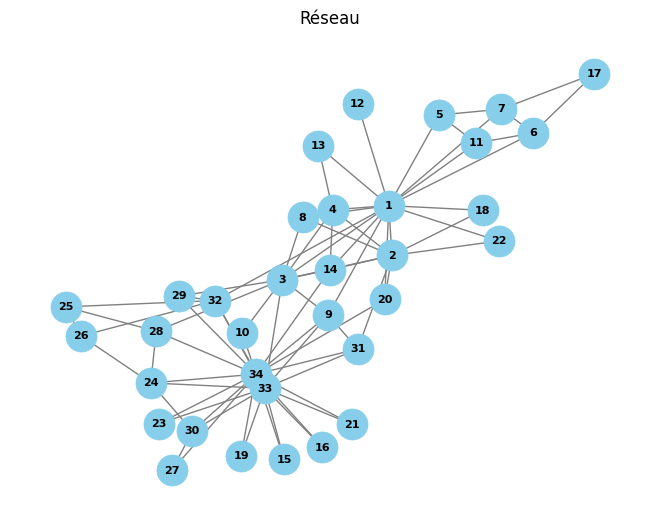

In [21]:
# Tracer le graphe du réseau des membres d'un club de karaté
import networkx as nx
import matplotlib.pyplot as plt

def visualize_network():
    # Les arêtes du réseau
    edges = [
    (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (11, 1), (12, 1),
    (13, 1), (14, 1), (18, 1), (20, 1), (22, 1), (32, 1),
    (3, 2), (4, 2), (8, 2), (14, 2), (18, 2), (20, 2), (22, 2), (31, 2),
    (4, 3), (8, 3), (9, 3), (10, 3), (14, 3), (28, 3), (29, 3), (33, 3),
    (8, 4), (13, 4), (14, 4),
    (7, 5), (11, 5),
    (7, 6), (11, 6), (17, 6),
    (17, 7),
    (31, 9), (33, 9), (34, 9),
    (34, 10),
    (34, 14),
    (33, 15), (34, 15),
    (33, 16), (34, 16),
    (33, 19), (34, 19),
    (34, 20),
    (33, 21), (34, 21),
    (33, 23), (34, 23),
    (26, 24), (28, 24), (30, 24), (33, 24), (34, 24),
    (26, 25), (28, 25), (32, 25),
    (32, 26),
    (30, 27), (34, 27),
    (34, 28),
    (32, 29), (34, 29),
    (33, 30), (34, 30),
    (33, 31), (34, 31),
    (33, 32), (34, 32),
    (34, 33)
]


    G = nx.Graph()

    # Ajouter les arêtes au graphe
    G.add_edges_from(edges)

    # Visualiser le graphe
    pos = nx.spring_layout(G)  # Layout algorithm for node positions
    nx.draw(G, pos, with_labels=True, node_size=500, font_size=8, font_color='black', font_weight='bold', node_color='skyblue', edge_color='gray', linewidths=0.5)

    # Afficher le graphique
    plt.title("Réseau")
    plt.show()

# Visualiser le réseau
visualize_network()


**Calcul des valeurs du PageRank pour $\alpha$ = 0.85 et $\beta$ = 1**

In [22]:
import networkx as nx
edges = [
    (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (11, 1), (12, 1),
    (13, 1), (14, 1), (18, 1), (20, 1), (22, 1), (32, 1),
    (3, 2), (4, 2), (8, 2), (14, 2), (18, 2), (20, 2), (22, 2), (31, 2),
    (4, 3), (8, 3), (9, 3), (10, 3), (14, 3), (28, 3), (29, 3), (33, 3),
    (8, 4), (13, 4), (14, 4),
    (7, 5), (11, 5),
    (7, 6), (11, 6), (17, 6),
    (17, 7),
    (31, 9), (33, 9), (34, 9),
    (34, 10),
    (34, 14),
    (33, 15), (34, 15),
    (33, 16), (34, 16),
    (33, 19), (34, 19),
    (34, 20),
    (33, 21), (34, 21),
    (33, 23), (34, 23),
    (26, 24), (28, 24), (30, 24), (33, 24), (34, 24),
    (26, 25), (28, 25), (32, 25),
    (32, 26),
    (30, 27), (34, 27),
    (34, 28),
    (32, 29), (34, 29),
    (33, 30), (34, 30),
    (33, 31), (34, 31),
    (33, 32), (34, 32),
    (34, 33)
]

G = nx.Graph()

# Ajouter les arêtes au graphe
G.add_edges_from(edges)

print('Les valeurs du PageRank sont:')
pagerank_result = calculer_pagerank(G, 0.85, 1)
sorted_nodes = sorted(pagerank_result.items(), key=lambda x: x[0])
for node, score in sorted_nodes:
    print(f"{node}: {score}")




Les valeurs du PageRank sont:
1: 21.986051354680146
2: 11.98543612052636
3: 12.937795484051392
4: 8.128234431586579
5: 4.981669202640295
6: 6.598528393763899
7: 6.5985283937639
8: 5.551179327997338
9: 6.746972711697176
10: 3.2434633492474596
11: 4.981669202640295
12: 2.168008978217383
13: 3.319508856025482
14: 6.694930061100434
15: 3.2948253061954844
16: 3.294825306195485
17: 3.804374567349658
18: 3.2999668340448736
19: 3.294825306195484
20: 4.443717567147965
21: 3.2948253061954844
22: 3.299966834044873
23: 3.294825306195485
24: 7.145103349380359
25: 4.777234273423838
26: 4.761404742751749
27: 3.409981965417792
28: 5.811680629445544
29: 4.436650811801126
30: 5.9587352108927085
31: 5.573768523011494
32: 8.422499735672934
33: 16.250464561304355
34: 22.875014662061847


**Calcul des valeurs de la centralité d'intermédiarité**

In [23]:
import networkx as nx
graph = {
    '1': {'2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '7': 1, '8': 1, '9': 1, '11': 1, '12': 1, '13': 1, '14': 1, '18': 1, '20': 1, '22': 1, '32': 1},
    '2': {'1': 1, '3': 1, '4': 1, '8': 1, '14': 1, '18': 1, '20': 1, '22': 1, '31': 1},
    '3': {'1': 1, '2': 1, '4': 1, '8': 1, '9': 1, '10': 1, '14': 1, '28': 1, '29': 1, '33': 1},
    '4': {'1': 1, '2': 1, '3': 1, '8': 1, '13': 1, '14': 1},
    '5': {'1': 1, '7': 1, '11': 1},
    '6': {'1': 1, '7': 1, '11': 1, '17': 1},
    '7': {'1': 1,'5': 1, '6': 1, '17': 1},
    '8': {'1': 1, '2': 1, '3': 1, '4': 1},
    '9': {'1': 1, '3': 1, '31': 1, '33': 1, '34': 1},
    '10': {'3': 1, '34':1},
    '11': {'1': 1, '5': 1, '6': 1},
    '12': {'1': 1},
    '13': {'1': 1, '4': 1},
    '14': {'1': 1, '2': 1, '3': 1, '4': 1, '34': 1},
    '15': {'33': 1, '34': 1},
    '16': {'33': 1, '34': 1},
    '17': {'6': 1, '7': 1},
    '18': {'1': 1, '2': 1},
    '19': {'33': 1, '34': 1},
    '20': {'1': 1, '2': 1, '34': 1},
    '21': {'33': 1, '34': 1},
    '22': {'1': 1, '2': 1},
    '23': {'33': 1, '34': 1},
    '24': {'26': 1, '28': 1, '30': 1, '33': 1, '34': 1},
    '25': {'26': 1, '28': 1, '32': 1},
    '26': {'24': 1, '25': 1, '32': 1},
    '27': {'30': 1, '34': 1},
    '28': {'3': 1, '24': 1, '25': 1, '34': 1},
    '29': {'3': 1, '32': 1, '34': 1},
    '30': {'24': 1, '27': 1, '33': 1, '34': 1},
    '31': {'2': 1, '9': 1, '33': 1, '34': 1},
    '32': {'1': 1, '25': 1, '26': 1, '29': 1, '33': 1, '34': 1},
    '33': {'3': 1, '9': 1, '15': 1, '16': 1, '19': 1, '21': 1, '23': 1, '24': 1, '30': 1, '31': 1, '32': 1, '34':1},
    '34': {'9': 1, '10': 1, '14': 1, '15': 1, '16': 1, '19': 1, '20': 1, '21': 1, '23': 1, '24': 1, '27': 1, '28': 1, '29': 1, '30': 1, '31': 1, '32': 1, '33': 1}
}



centrality_scores = betweenness_centrality(graph)

print("Scores de centralité d'intermédiarité :")
for node, score in centrality_scores.items():
    print(f"{node}: {score}")



Scores de centralité d'intermédiarité :
1: 0.3553571428571464
2: 0.04724251443001442
3: 0.13260131072631112
4: 0.011120129870129865
5: 0.0006313131313131314
6: 0.02563206469456468
7: 0.025632064694564676
8: 0.0
9: 0.046046025733525724
10: 0.0008477633477633477
11: 0.0006313131313131314
12: 0.0
13: 0.0
14: 0.04207251082251076
15: 0.0
16: 0.0
17: 0.0
18: 0.0
19: 0.0
20: 0.03003472222222219
21: 0.0
22: 0.0
23: 0.0
24: 0.015340909090909087
25: 0.00220959595959596
26: 0.003787878787878787
27: 0.0
28: 0.020986652236652227
29: 0.0017947330447330447
30: 0.002922077922077922
31: 0.012044552669552672
32: 0.12082356301106306
33: 0.12226806758056742
34: 0.25624887265512364


**Calcul des valeurs de la centralité de proximité**

In [24]:
import networkx as nx
graph = {
    '1': {'2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '7': 1, '8': 1, '9': 1, '11': 1, '12': 1, '13': 1, '14': 1, '18': 1, '20': 1, '22': 1, '32': 1},
    '2': {'1': 1, '3': 1, '4': 1, '8': 1, '14': 1, '18': 1, '20': 1, '22': 1, '31': 1},
    '3': {'1': 1, '2': 1, '4': 1, '8': 1, '9': 1, '10': 1, '14': 1, '28': 1, '29': 1, '33': 1},
    '4': {'1': 1, '2': 1, '3': 1, '8': 1, '13': 1, '14': 1},
    '5': {'1': 1, '7': 1, '11': 1},
    '6': {'1': 1, '7': 1, '11': 1, '17': 1},
    '7': {'1': 1,'5': 1, '6': 1, '17': 1},
    '8': {'1': 1, '2': 1, '3': 1, '4': 1},
    '9': {'1': 1, '3': 1, '31': 1, '33': 1, '34': 1},
    '10': {'3': 1, '34':1},
    '11': {'1': 1, '5': 1, '6': 1},
    '12': {'1': 1},
    '13': {'1': 1, '4': 1},
    '14': {'1': 1, '2': 1, '3': 1, '4': 1, '34': 1},
    '15': {'33': 1, '34': 1},
    '16': {'33': 1, '34': 1},
    '17': {'6': 1, '7': 1},
    '18': {'1': 1, '2': 1},
    '19': {'33': 1, '34': 1},
    '20': {'1': 1, '2': 1, '34': 1},
    '21': {'33': 1, '34': 1},
    '22': {'1': 1, '2': 1},
    '23': {'33': 1, '34': 1},
    '24': {'26': 1, '28': 1, '30': 1, '33': 1, '34': 1},
    '25': {'26': 1, '28': 1, '32': 1},
    '26': {'24': 1, '25': 1, '32': 1},
    '27': {'30': 1, '34': 1},
    '28': {'3': 1, '24': 1, '25': 1, '34': 1},
    '29': {'3': 1, '32': 1, '34': 1},
    '30': {'24': 1, '27': 1, '33': 1, '34': 1},
    '31': {'2': 1, '9': 1, '33': 1, '34': 1},
    '32': {'1': 1, '25': 1, '26': 1, '29': 1, '33': 1, '34': 1},
    '33': {'3': 1, '9': 1, '15': 1, '16': 1, '19': 1, '21': 1, '23': 1, '24': 1, '30': 1, '31': 1, '32': 1, '34':1},
    '34': {'9': 1, '10': 1, '14': 1, '15': 1, '16': 1, '19': 1, '20': 1, '21': 1, '23': 1, '24': 1, '27': 1, '28': 1, '29': 1, '30': 1, '31': 1, '32': 1, '33': 1}
}


nodes = list(graph.keys())

result = proximity_centrality(graph)

i = 0
for node in nodes:
  print(f"La centralité de proximité du noeud {node} est : {result[i]}")
  i += 1


La centralité de proximité du noeud 1 est : 0.5862068965517242
La centralité de proximité du noeud 2 est : 0.5
La centralité de proximité du noeud 3 est : 0.576271186440678
La centralité de proximité du noeud 4 est : 0.4788732394366197
La centralité de proximité du noeud 5 est : 0.39080459770114945
La centralité de proximité du noeud 6 est : 0.39534883720930236
La centralité de proximité du noeud 7 est : 0.39534883720930236
La centralité de proximité du noeud 8 est : 0.4533333333333333
La centralité de proximité du noeud 9 est : 0.53125
La centralité de proximité du noeud 10 est : 0.4473684210526316
La centralité de proximité du noeud 11 est : 0.39080459770114945
La centralité de proximité du noeud 12 est : 0.37777777777777777
La centralité de proximité du noeud 13 est : 0.38202247191011235
La centralité de proximité du noeud 14 est : 0.53125
La centralité de proximité du noeud 15 est : 0.38202247191011235
La centralité de proximité du noeud 16 est : 0.38202247191011235
La centralité d

**Nous passons ensuite au réseau suivant, celui de type Facebook et nous appliquins les mêmes algorithme à nouveau pour ce graphe. Commençons d'abord par le visualiser.**


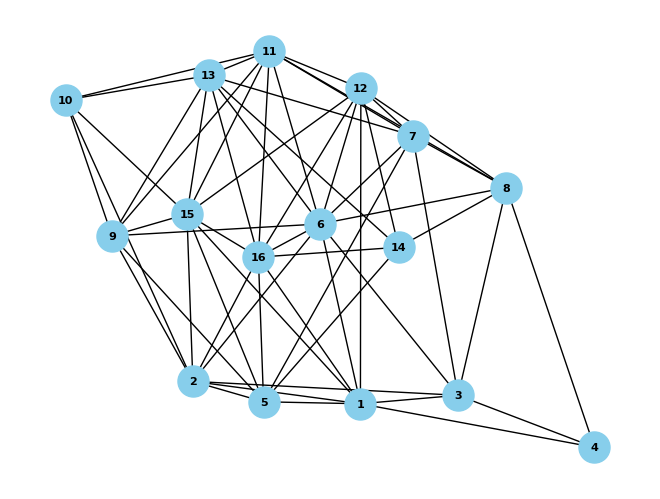

In [25]:
# Visualiser le graphe de type Facebook
import networkx as nx
import matplotlib.pyplot as plt


graph_data = [
    (1, 2), (1, 3), (2, 3), (1, 4), (3, 4), (1, 5), (2, 5), (1, 6), (2, 6), (3, 6),
    (3, 7), (5, 7), (6, 7), (3, 8), (4, 8), (6, 8), (7, 8), (2, 9), (5, 9), (6, 9),
    (2, 10), (9, 10), (6, 11), (7, 11), (8, 11), (9, 11), (10, 11), (1, 12), (6, 12),
    (7, 12), (8, 12), (11, 12), (6, 13), (7, 13), (9, 13), (10, 13), (11, 13),
    (5, 14), (8, 14), (12, 14), (13, 14), (1, 15), (2, 15), (5, 15), (9, 15), (10, 15),
    (11, 15), (12, 15), (13, 15), (1, 16), (2, 16), (5, 16), (6, 16), (11, 16),
    (12, 16), (13, 16), (14, 16), (15, 16)
]


G = nx.Graph()


G.add_edges_from(graph_data)


pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=500, node_color='skyblue', font_color='black', font_size=8)


plt.show()


In [26]:
# Nous calculons ici les valuers de la centralité de PageRank pour ce réseau de type Facebook

graph = [
    (1, 2), (1, 3), (2, 3), (1, 4), (3, 4), (1, 5), (2, 5), (1, 6), (2, 6), (3, 6),
    (3, 7), (5, 7), (6, 7), (3, 8), (4, 8), (6, 8), (7, 8), (2, 9), (5, 9), (6, 9),
    (2, 10), (9, 10), (6, 11), (7, 11), (8, 11), (9, 11), (10, 11), (1, 12), (6, 12),
    (7, 12), (8, 12), (11, 12), (6, 13), (7, 13), (9, 13), (10, 13), (11, 13),
    (5, 14), (8, 14), (12, 14), (13, 14), (1, 15), (2, 15), (5, 15), (9, 15), (10, 15),
    (11, 15), (12, 15), (13, 15), (1, 16), (2, 16), (5, 16), (6, 16), (11, 16),
    (12, 16), (13, 16), (14, 16), (15, 16)
]


G = nx.Graph()


G.add_edges_from(graph)
print('Les valeurs du PageRank sont:')
pagerank_result = calculer_pagerank(G, 0.85, 1)
sorted_nodes = sorted(pagerank_result.items(), key=lambda x: x[0])
for node, score in sorted_nodes:
    print(f"{node}: {score}")



Les valeurs du PageRank sont:
1: 7.369728566951194
2: 7.241452885979734
3: 5.865449533441671
4: 3.4252191945902126
5: 6.444481274298918
6: 8.790562609389502
7: 6.457195788413837
8: 6.680856415449274
9: 6.389441449395271
10: 4.816718136997807
11: 7.972574231053564
12: 7.210626174026472
13: 7.2110484940566915
14: 4.876815899355457
15: 7.9656752530420984
16: 7.948820760224947


In [27]:
# Nous cauculons ici les valeurs de la centralité d'intermédiarité

graph = {
    '1': {'2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '12': 1, '15': 1, '16': 1},
    '2': {'1': 1, '3': 1, '5': 1, '6': 1, '9': 1, '10': 1, '15': 1, '16': 1},
    '3': {'1': 1, '2': 1, '4': 1, '6': 1, '7': 1, '8': 1, '8': 1},
    '4': {'1': 1, '3': 1, '8': 1},
    '5': {'1': 1, '2': 1, '7': 1, '9': 1, '14': 1, '15': 1, '16': 1},
    '6': {'1': 1, '2': 1, '3': 1, '9': 1, '11': 1, '12': 1, '13': 1, '16': 1},
    '7': {'3': 1, '5': 1, '6': 1, '8': 1, '11': 1, '12': 1, '13': 1},
    '8': {'3': 1, '4': 1, '7': 1, '11': 1, '12': 1, '13': 1},
    '9': {'2': 1, '5': 1, '6': 1, '10': 1, '11': 1, '13': 1, '15': 1},
    '10': {'2': 1, '9': 1, '11': 1, '13': 1, '15': 1},
    '11': {'6': 1, '7': 1, '8': 1, '9': 1, '10': 1, '12': 1, '13': 1, '16': 1},
    '12': {'1': 1, '6': 1, '7': 1, '8': 1, '11': 1, '13': 1, '14': 1, '15': 1, '16': 1},
    '13': {'6': 1, '7': 1, '9': 1, '10': 1, '11': 1, '12': 1, '14': 1, '15': 1, '16': 1},
    '14': {'5': 1, '8': 1, '12': 1, '13': 1, '15': 1, '16': 1},
    '15': {'1': 1, '2': 1, '5': 1, '9': 1, '10': 1, '11': 1, '12': 1, '13': 1, '14': 1, '16': 1},
    '16': {'1': 1, '2': 1, '5': 1, '6': 1, '11': 1, '12': 1, '13': 1, '14': 1, '15': 1}
}

centrality_scores = betweenness_centrality(graph)

print("Scores de centralité d'intermédiarité :")
for node, score in centrality_scores.items():
    print(f"{node}: {score}")



Scores de centralité d'intermédiarité :
1: 0.07532879818594106
2: 0.051921768707482996
3: 0.0419501133786848
4: 0.0031746031746031746
5: 0.03230725623582766
6: 0.044178004535147405
7: 0.03142857142857143
8: 0.05028344671201814
9: 0.01885487528344671
10: 0.005000000000000001
11: 0.05132086167800456
12: 0.045839002267573724
13: 0.0591326530612245
14: 0.011031746031746031
15: 0.05310090702947848
16: 0.035600907029478455


In [28]:
# Nous calculons ensuite les valeurs de la centralité de proximité de ce réseau de type Facebook

graph = {
    '1': {'2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '12': 1, '15': 1, '16': 1},
    '2': {'1': 1, '3': 1, '5': 1, '6': 1, '9': 1, '10': 1, '15': 1, '16': 1},
    '3': {'1': 1, '2': 1, '4': 1, '6': 1, '7': 1, '8': 1, '8': 1},
    '4': {'1': 1, '3': 1, '8': 1},
    '5': {'1': 1, '2': 1, '7': 1, '9': 1, '14': 1, '15': 1, '16': 1},
    '6': {'1': 1, '2': 1, '3': 1, '9': 1, '11': 1, '12': 1, '13': 1, '16': 1},
    '7': {'3': 1, '5': 1, '6': 1, '8': 1, '11': 1, '12': 1, '13': 1},
    '8': {'3': 1, '4': 1, '7': 1, '11': 1, '12': 1, '13': 1},
    '9': {'2': 1, '5': 1, '6': 1, '10': 1, '11': 1, '13': 1, '15': 1},
    '10': {'2': 1, '9': 1, '11': 1, '13': 1, '15': 1},
    '11': {'6': 1, '7': 1, '8': 1, '9': 1, '10': 1, '12': 1, '13': 1, '16': 1},
    '12': {'1': 1, '6': 1, '7': 1, '8': 1, '11': 1, '13': 1, '14': 1, '15': 1, '16': 1},
    '13': {'6': 1, '7': 1, '9': 1, '10': 1, '11': 1, '12': 1, '14': 1, '15': 1, '16': 1},
    '14': {'5': 1, '8': 1, '12': 1, '13': 1, '15': 1, '16': 1},
    '15': {'1': 1, '2': 1, '5': 1, '9': 1, '10': 1, '11': 1, '12': 1, '13': 1, '14': 1, '16': 1},
    '16': {'1': 1, '2': 1, '5': 1, '6': 1, '11': 1, '12': 1, '13': 1, '14': 1, '15': 1}
}

nodes = list(graph.keys())

result = proximity_centrality(graph)

i = 0
for node in nodes:
  print(f"La centralité de proximité du noeud {node} est : {result[i]}")
  i += 1




La centralité de proximité du noeud 1 est : 0.7272727272727273
La centralité de proximité du noeud 2 est : 0.7272727272727273
La centralité de proximité du noeud 3 est : 0.64
La centralité de proximité du noeud 4 est : 0.5333333333333333
La centralité de proximité du noeud 5 est : 0.6956521739130435
La centralité de proximité du noeud 6 est : 0.7272727272727273
La centralité de proximité du noeud 7 est : 0.6956521739130435
La centralité de proximité du noeud 8 est : 0.6666666666666666
La centralité de proximité du noeud 9 est : 0.6666666666666666
La centralité de proximité du noeud 10 est : 0.6153846153846154
La centralité de proximité du noeud 11 est : 0.7272727272727273
La centralité de proximité du noeud 12 est : 0.7619047619047619
La centralité de proximité du noeud 13 est : 0.7272727272727273
La centralité de proximité du noeud 14 est : 0.6666666666666666
La centralité de proximité du noeud 15 est : 0.8
La centralité de proximité du noeud 16 est : 0.7619047619047619


**Passons ensuite au dernier réseau et commençons par le tracer**

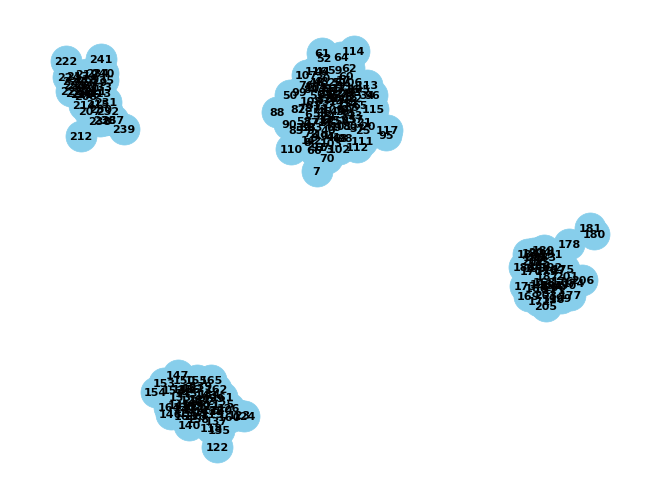

In [29]:
graph_data = [
    (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7),
    (8, 9), (8, 10), (8, 5), (8, 11), (8, 12),
    (13, 14), (13, 15), (13, 16), (13, 17), (13, 18), (13, 19),
    (20, 21), (20, 22), (20, 23), (20, 24), (20, 25),
    (26, 27), (26, 28), (26, 29), (26, 30), (26, 31), (26, 32), (26, 33),
    (34, 15), (34, 16), (34, 35), (34, 23),
    (21, 36), (21, 37), (21, 38), (21, 23), (21, 25),
    (2, 39), (2, 40), (2, 10), (2, 41), (2, 11), (2, 42),
    (43, 13), (43, 44), (43, 45), (43, 36), (43, 15), (43, 46), (43, 47), (43, 11),
    (48, 26), (48, 29), (48, 31), (48, 49), (48, 50), (48, 51), (48, 52),
    (9, 40), (9, 53), (9, 10), (9, 3),
    (27, 26), (27, 16), (27, 54), (27, 46), (27, 55), (27, 25),
    (56, 14), (56, 18), (56, 57), (56, 58),
    (59, 13), (59, 15), (59, 60), (59, 4), (59, 61),
    (62, 26), (62, 15), (62, 63), (62, 64),
    (65, 13), (65, 15), (65, 18), (65, 11),
    (66, 9), (66, 40), (66, 67), (66, 12),
    (68, 53), (68, 57), (68, 41), (68, 69), (68, 70),
    (71, 40), (71, 54), (71, 28), (71, 72), (71, 73),
    (14, 15), (14, 17), (14, 18), (14, 74), (14, 75),
    (44, 48), (44, 36), (44, 46), (44, 76), (44, 64),
    (45, 36), (45, 47), (45, 63), (45, 10), (45, 77), (45, 76),
    (36, 45), (36, 78), (36, 63), (36, 76), (36, 79),
    (80, 45), (80, 15), (80, 23), (80, 75),
    (81, 82), (81, 15), (81, 63), (81, 77), (81, 24),
    (82, 9), (82, 83), (82, 46), (82, 84), (82, 85),
    (78, 86), (78, 76), (78, 38), (78, 87), (78, 88),
    (89, 9), (89, 40), (89, 50), (89, 5), (89, 75), (89, 11), (89, 90),
    (15, 13), (15, 16), (15, 18), (15, 54), (15, 74), (15, 23), (15, 12), (39, 78), (39, 5), (39, 11), (39, 12), (39, 24),
    (16, 15), (16, 17), (16, 19), (16, 63),
    (83, 15), (83, 10), (83, 91), (83, 42),
    (22, 13), (22, 20), (22, 15), (22, 16), (22, 17), (22, 92), (22, 4), (22, 23),
    (93, 45), (93, 32), (93, 69), (93, 11), (93, 24), (93, 25),
    (17, 13), (17, 16), (17, 19), (17, 84), (17, 74), (17, 64),
    (40, 9), (40, 15), (40, 94), (40, 23), (40, 73), (40, 12),
    (18, 56), (18, 14), (18, 15), (18, 74),
    (95, 20), (95, 21), (95, 25),
    (96, 15), (96, 16), (96, 54),
    (97, 19), (97, 74), (97, 12),
    (54, 15), (54, 40), (54, 74), (54, 10), (54, 23),
    (46, 84), (46, 60), (46, 87), (46, 55),
    (35, 18), (35, 74), (35, 92), (35, 98), (35, 33),
    (19, 13), (19, 36), (19, 16), (19, 17), (19, 97), (19, 63), (19, 12),
    (84, 46), (84, 99), (84, 73), (84, 87),
    (74, 13), (74, 14), (74, 18), (74, 35), (74, 100), (74, 42),
    (101, 14), (101, 74), (101, 3), (101, 57), (101, 87), (101, 102),
    (67, 66), (67, 89), (67, 103), (67, 10), (67, 98), (67, 12), (67, 42),
    (53, 78), (53, 89), (53, 84), (53, 63), (53, 29),
    (103, 41), (103, 75), (103, 98), (103, 42),
    (47, 13), (47, 36), (47, 16), (47, 17), (47, 97), (47, 12), (47, 64),
    (28, 44),(28, 18), (28, 31), (28, 100), (28, 11), (28, 12),
    (94, 40), (94, 10), (94, 41), (94, 11), (94, 55), (94, 102),
    (63, 16), (63, 19), (63, 29), (63, 51), (63, 75), (63, 52),
    (10, 9), (10, 89), (10, 54), (10, 91),
    (29, 34), (29, 15), (29, 16), (29, 104), (29, 105), (29, 57), (29, 106), (29, 23),
    (60, 59), (60, 15), (60, 16), (60, 74), (60, 31), (60, 33),
    (3, 9), (3, 101), (3, 67), (3, 41), (3, 11), (3, 42),
    (107, 84), (107, 108), (107, 92), (107, 87),
    (30, 13), (30, 27), (30, 84), (30, 100), (30, 99), (30, 55),
    (31, 48), (31, 109), (31, 49), (31, 41), (31, 6),
    (86, 13), (86, 78), (86, 18), (86, 63), (86, 106), (86, 38), (86, 55),
    (110, 2), (110, 58), (110, 42),
    (108, 74), (108, 10), (108, 107), (108, 92), (108, 12),
    (32, 47), (32, 28), (32, 92), (32, 4), (32, 6),
    (77, 81), (77, 89), (77, 10), (77, 75),
    (109, 26), (109, 35), (109, 31), (109, 41), (109, 4), (109, 69), (109, 33), (109, 6),
    (104, 29), (104, 30), (104, 4), (104, 51), (104, 58),
    (92, 13), (92, 16), (92, 35), (92, 107), (92, 108), (92, 24),
    (111, 23),
    (112, 20), (112, 93), (112, 3), (112, 25), (112, 102),
    (105, 54), (105, 35), (105, 87),
    (113, 93), (113, 29), (113, 60),
    (114, 60), (114, 51),
    (115, 15), (115, 54), (115, 23),
    (85, 9), (85, 78), (85, 40), (85, 5),
    (76, 45), (76, 36), (76, 78),
    (72, 1), (72, 45), (72, 78), (72, 67), (72, 103), (72, 42),
    (49, 48), (49, 68), (49, 15), (49, 16), (49, 103), (49, 31),
    (37, 15), (37, 40), (37, 54), (37, 23), (37, 25),
    (100, 97), (100, 35), (100, 74), (100, 31), (100, 49), (100, 12),
    (57, 14), (57, 74), (57, 101), (57, 29),
    (41, 2), (41, 9), (41, 68), (41, 31), (41, 69), (99, 84), (99, 73), (99, 55),
    (116, 48), (116, 74), (116, 4), (116, 52),
    (79, 36), (79, 97), (79, 47), (79, 69), (79, 11),
    (4, 46), (4, 74), (4, 32), (4, 6),
    (51, 14),
    (5, 9), (5, 66), (5, 45), (5, 85), (5, 4), (5, 69), (5, 91), (5, 6),
    (106, 36), (106, 97), (106, 74),
    (38, 78), (38, 101), (38, 10), (38, 77), (38, 5), (38, 69), (38, 58),
    (69, 9), (69, 40), (69, 101), (69, 111), (69, 98), (69, 12),
    (23, 40), (23, 63), (23, 111), (23, 51), (23, 102),
    (75, 80), (75, 89), (75, 40), (75, 19), (75, 63), (75, 12),
    (73, 71), (73, 40), (73, 54), (73, 72), (73, 51), (73, 69), (73, 12),
    (98, 97), (98, 94), (98, 111), (98, 25), (98, 91),
    (11, 9), (11, 15), (11, 40), (11, 12),
    (33, 34), (33, 15), (33, 35), (33, 28), (33, 23),
    (12, 28), (12, 100), (12, 75), (12, 11),
    (87, 84), (87, 74), (87, 101), (87, 69), (87, 11), (87, 61),
    (55, 46), (55, 84), (55, 32), (55, 92), (55, 99), (55, 4), (55, 87),
    (24, 81), (24, 39), (24, 35), (24, 32), (24, 75), (24, 90),
    (58, 110), (58, 99), (58, 91), (58, 42), (58, 88),
    (70, 9), (70, 68), (70, 10), (70, 41),
    (25, 20), (25, 111), (25, 41), (25, 23),
    (117, 20), (117, 21), (117, 95), (117, 25),
    (102, 40), (102, 94), (102, 10), (102, 7),
    (91, 83), (91, 94), (91, 3),
    (118, 119), (118, 120), (118, 121), (118, 122),
    (123, 124), (123, 125), (123, 120), (123, 126),  (119, 127), (119, 125), (119, 128), (119, 129), (119, 126),
    (124, 123), (124, 125), (124, 126),
    (127, 119), (127, 125), (127, 130), (127, 131), (127, 121), (127, 129), (127, 132), (127, 133),
    (125, 119), (125, 127), (125, 134), (125, 121), (125, 132),
    (135, 136), (135, 137), (135, 121),
    (136, 127), (136, 120), (136, 121), (136, 138), (136, 139), (136, 126),
    (130, 140), (130, 141), (130, 138),
    (120, 118), (120, 127), (120, 136), (120, 121), (120, 132),
    (137, 118), (137, 127), (137, 142), (137, 143), (137, 122), (137, 126),
    (140, 130), (140, 144), (140, 121), (140, 138),
    (145, 127), (145, 141), (145, 128), (145, 132), (145, 143), (145, 146), (145, 147),
    (148, 127), (148, 145), (148, 149), (148, 150), (148, 121), (148, 151),
    (142, 127), (142, 125), (142, 137), (142, 121), (142, 132), (142, 133),
    (149, 127), (149, 128), (149, 152),
    (153, 148), (153, 152), (153, 133), (153, 154), (153, 147),
    (131, 118), (131, 127), (131, 121), (131, 133),
    (150, 127), (150, 148), (150, 152), (150, 151), (150, 155), (150, 156),
    (157, 127), (157, 136), (157, 149), (157, 128), (157, 158), (157, 133),
    (159, 127), (159, 131), (159, 121),
    (134, 127), (134, 144), (134, 128), (134, 132), (134, 143),
    (144, 127), (144, 130), (144, 140), (144, 134), (144, 132), (144, 143), (144, 156),
    (121, 127), (121, 136), (121, 120), (121, 129), (121, 126),
    (160, 123), (160, 119), (160, 124), (160, 136), (160, 121), (160, 126),
    (141, 127), (141, 130), (141, 144), (141, 138), (141, 129), (141, 133),
    (138, 130), (138, 140), (138, 144), (138, 121), (138, 141), (138, 128), (138, 129),
    (128, 127), (128, 121), (128, 141), (128, 129), (128, 132), (128, 133), (128, 146),
    (161, 127), (161, 125), (161, 120), (161, 121), (161, 126), (161, 162),
    (129, 127), (129, 131), (129, 121), (129, 141), (129, 128), (129, 132), (129, 155),
    (152, 149), (152, 128), (152, 154),
    (158, 119), (158, 127), (158, 149), (158, 157), (158, 121), (158, 138), (158, 129),
    (151, 127), (151, 130), (151, 131), (151, 121), (151, 139), (151, 147),
    (139, 134), (139, 152), (139, 151), (139, 162),
    (132, 127), (132, 121), (132, 163),
    (133, 153), (133, 152), (133, 154),
    (155, 127), (155, 150), (155, 151), (155, 162), (155, 147),
    (164, 131), (164, 128), (164, 152),
    (163, 149), (163, 121), (163, 128), (163, 132), (163, 146),
    (165, 159), (165, 128), (165, 162),
    (143, 161), (143, 151),
    (156, 127), (156, 128), (156, 132), (156, 133),
    (146, 145), (146, 128),
    (162, 127), (162, 121), (162, 126),
    (166, 167), (166, 168), (166, 169), (166, 170), (166, 171), (166, 172), (166, 173),
    (174, 175), (174, 167), (174, 171), (174, 176), (174, 177),
    (178, 167), (178, 179), (178, 180), (178, 181),
    (182, 183), (182, 184), (182, 185), (182, 186), (182, 187), (182, 188), (182, 189),
    (175, 174), (175, 190), (175, 171), (175, 183), (175, 176), (175, 191),
    (192, 167), (192, 170), (192, 193), (192, 183), (192, 194), (192, 195), (192, 191), (192, 189),
    (196, 168), (196, 171), (196, 197), (196, 194), (196, 198), (196, 199), (196, 177),
    (167, 178), (167, 168), (167, 171), (167, 194),
    (168, 167), (168, 179), (168, 185), (168, 197), (168, 194), (168, 198), (168, 200),
    (169, 166), (169, 170), (169, 172), (169, 197), (169, 173),
    (201, 192), (201, 194), (201, 200), (201, 187),
    (190, 167), (190, 197), (190, 194), (190, 176),
    (170, 166), (170, 169), (170, 193), (170, 202), (170, 185), (170, 187), (170, 188), (170, 189),
    (193, 185), (193, 186), (193, 188), (193, 195), (193, 191),
    (171, 166), (171, 167), (171, 194),  (171, 199),
    (202, 193), (202, 183), (202, 184), (202, 185), (202, 198), (202, 195), (202, 191), (202, 189),
    (203, 168), (203, 179), (203, 197), (203, 194), (203, 198),
    (183, 192), (183, 184), (183, 186), (183, 204), (183, 195), (183, 191),
    (179, 168), (179, 197), (179, 194), (179, 200), (179, 188),
    (184, 193), (184, 183), (184, 186), (184, 188), (184, 195),
    (185, 182), (185, 193), (185, 186), (185, 187), (185, 195), (185, 191),
    (172, 166), (172, 169), (172, 171), (172, 198), (172, 200),
    (197, 168), (197, 171), (197, 194), (197, 177), (197, 187), (197, 195),
    (194, 168), (194, 171), (194, 198), (194, 200), (194, 187),
    (176, 190), (176, 177),
    (186, 193), (186, 184), (186, 176), (186, 198), (186, 187), (186, 195),
    (198, 192), (198, 196), (198, 168), (198, 202), (198, 194), (198, 176), (198, 186),
    (180, 181),
    (205, 197), (205, 194), (205, 198),
    (200, 168), (200, 201), (200, 199), (200, 187),
    (204, 167), (204, 170), (204, 183), (204, 184), (204, 185),
    (173, 166), (173, 169), (173, 170), (173, 197), (173, 188),
    (206, 192), (206, 177),
    (199, 171), (199, 194), (199, 187),
    (207, 208), (207, 209), (207, 210), (207, 211), (207, 212), (207, 213),
    (214, 209), (214, 215), (214, 210), (214, 216), (214, 213),
    (217, 209), (217, 218), (217, 219), (217, 220), (217, 221), (217, 222),
    (223, 208), (223, 210), (223, 220), (223, 221), (223, 211), (223, 224), (223, 213),
    (208, 209), (208, 225), (208, 210), (208, 216),
    (209, 217), (209, 208), (209, 226), (209, 221), (209, 211), (209, 213),
    (226, 217), (226, 208), (226, 209), (226, 219), (226, 220), (226, 221), (226, 224),
    (227, 208), (227, 228), (227, 210), (227, 224), (227, 216), (227, 229),
    (230, 231), (230, 216), (230, 232), (230, 213),
    (233, 210), (233, 220), (233, 216), (233, 234), (233, 229), (233, 213), (233, 235),
    (215, 226), (215, 236), (215, 231), (215, 213), (215, 237),
    (236, 215), (236, 231), (236, 232), (236, 237),
    (218, 217), (218, 209), (218, 215), (218, 221), (218, 213), (218, 222),
    (228, 217), (228, 208), (228, 209), (228, 219), (228, 210), (228, 220), (228, 211), (228, 216),
    (225, 217), (225, 208), (225, 209), (225, 228), (225, 210), (225, 220), (225, 216),
    (238, 215), (238, 231), (238, 232), (238, 237),
    (239, 232), (239, 237),
    (231, 208), (231, 233), (231, 215), (231, 238), (231, 232), (231, 235), (231, 237),
    (219, 226), (219, 228), (219, 210), (219, 220), (219, 221), (219, 224),
    (210, 208), (210, 209), (210, 227), (210, 220), (210, 221), (210, 211),
    (220, 217), (220, 208), (220, 209), (220, 226), (220, 210), (220, 221), (220, 216),
    (221, 208), (221, 228), (221, 225), (221, 219), (221, 220),
    (211, 217), (211, 223), (211, 208), (211, 209), (211, 210), (211, 240), (211, 216), (211, 234), (211, 232),
    (224, 223), (224, 226), (224, 219), (224, 220), (224, 221),
    (240, 219), (240, 234), (240, 213), (240, 235),
    (216, 223), (216, 208), (216, 233), (216, 225), (216, 210),
    (234, 219), (234, 240), (234, 213),
    (229, 208), (229, 209), (229, 227), (229, 231), (229, 220), (229, 241),
    (232, 236), (232, 231), (232, 220), (232, 237),
    (213, 209), (213, 240), (213, 234), (213, 229),
    (235, 226), (235, 219), (235, 240), (235, 216), (235, 213), (235, 241)
]


G = nx.Graph()

# Ajouter les arêtes au graphe
G.add_edges_from(graph_data)

# Visualiser le graphe
pos = nx.spring_layout(G)  # Layout algorithm for node positions
nx.draw(G, pos, with_labels=True, node_size=500, font_size=8, font_color='black', font_weight='bold', node_color='skyblue', edge_color='gray', linewidths=0.5)


plt.show()

**Nous calculons par la suite les valeurs de le centralité du PageRank pour ce réseau, et vu la taille du réseau, nous ajoutons quelques lignes pour calculer la valeur maximale, minimale et moyenne des valeurs du PageRank avec les noeuds associés, tout cela afin de remplir la table de synthèse.**

In [30]:
graph = [
    (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7),
    (8, 9), (8, 10), (8, 5), (8, 11), (8, 12),
    (13, 14), (13, 15), (13, 16), (13, 17), (13, 18), (13, 19),
    (20, 21), (20, 22), (20, 23), (20, 24), (20, 25),
    (26, 27), (26, 28), (26, 29), (26, 30), (26, 31), (26, 32), (26, 33),
    (34, 15), (34, 16), (34, 35), (34, 23),
    (21, 36), (21, 37), (21, 38), (21, 23), (21, 25),
    (2, 39), (2, 40), (2, 10), (2, 41), (2, 11), (2, 42),
    (43, 13), (43, 44), (43, 45), (43, 36), (43, 15), (43, 46), (43, 47), (43, 11),
    (48, 26), (48, 29), (48, 31), (48, 49), (48, 50), (48, 51), (48, 52),
    (9, 40), (9, 53), (9, 10), (9, 3),
    (27, 26), (27, 16), (27, 54), (27, 46), (27, 55), (27, 25),
    (56, 14), (56, 18), (56, 57), (56, 58),
    (59, 13), (59, 15), (59, 60), (59, 4), (59, 61),
    (62, 26), (62, 15), (62, 63), (62, 64),
    (65, 13), (65, 15), (65, 18), (65, 11),
    (66, 9), (66, 40), (66, 67), (66, 12),
    (68, 53), (68, 57), (68, 41), (68, 69), (68, 70),
    (71, 40), (71, 54), (71, 28), (71, 72), (71, 73),
    (14, 15), (14, 17), (14, 18), (14, 74), (14, 75),
    (44, 48), (44, 36), (44, 46), (44, 76), (44, 64),
    (45, 36), (45, 47), (45, 63), (45, 10), (45, 77), (45, 76),
    (36, 45), (36, 78), (36, 63), (36, 76), (36, 79),
    (80, 45), (80, 15), (80, 23), (80, 75),
    (81, 82), (81, 15), (81, 63), (81, 77), (81, 24),
    (82, 9), (82, 83), (82, 46), (82, 84), (82, 85),
    (78, 86), (78, 76), (78, 38), (78, 87), (78, 88),
    (89, 9), (89, 40), (89, 50), (89, 5), (89, 75), (89, 11), (89, 90),
    (15, 13), (15, 16), (15, 18), (15, 54), (15, 74), (15, 23), (15, 12), (39, 78), (39, 5), (39, 11), (39, 12), (39, 24),
    (16, 15), (16, 17), (16, 19), (16, 63),
    (83, 15), (83, 10), (83, 91), (83, 42),
    (22, 13), (22, 20), (22, 15), (22, 16), (22, 17), (22, 92), (22, 4), (22, 23),
    (93, 45), (93, 32), (93, 69), (93, 11), (93, 24), (93, 25),
    (17, 13), (17, 16), (17, 19), (17, 84), (17, 74), (17, 64),
    (40, 9), (40, 15), (40, 94), (40, 23), (40, 73), (40, 12),
    (18, 56), (18, 14), (18, 15), (18, 74),
    (95, 20), (95, 21), (95, 25),
    (96, 15), (96, 16), (96, 54),
    (97, 19), (97, 74), (97, 12),
    (54, 15), (54, 40), (54, 74), (54, 10), (54, 23),
    (46, 84), (46, 60), (46, 87), (46, 55),
    (35, 18), (35, 74), (35, 92), (35, 98), (35, 33),
    (19, 13), (19, 36), (19, 16), (19, 17), (19, 97), (19, 63), (19, 12),
    (84, 46), (84, 99), (84, 73), (84, 87),
    (74, 13), (74, 14), (74, 18), (74, 35), (74, 100), (74, 42),
    (101, 14), (101, 74), (101, 3), (101, 57), (101, 87), (101, 102),
    (67, 66), (67, 89), (67, 103), (67, 10), (67, 98), (67, 12), (67, 42),
    (53, 78), (53, 89), (53, 84), (53, 63), (53, 29),
    (103, 41), (103, 75), (103, 98), (103, 42),
    (47, 13), (47, 36), (47, 16), (47, 17), (47, 97), (47, 12), (47, 64),
    (28, 44),(28, 18), (28, 31), (28, 100), (28, 11), (28, 12),
    (94, 40), (94, 10), (94, 41), (94, 11), (94, 55), (94, 102),
    (63, 16), (63, 19), (63, 29), (63, 51), (63, 75), (63, 52),
    (10, 9), (10, 89), (10, 54), (10, 91),
    (29, 34), (29, 15), (29, 16), (29, 104), (29, 105), (29, 57), (29, 106), (29, 23),
    (60, 59), (60, 15), (60, 16), (60, 74), (60, 31), (60, 33),
    (3, 9), (3, 101), (3, 67), (3, 41), (3, 11), (3, 42),
    (107, 84), (107, 108), (107, 92), (107, 87),
    (30, 13), (30, 27), (30, 84), (30, 100), (30, 99), (30, 55),
    (31, 48), (31, 109), (31, 49), (31, 41), (31, 6),
    (86, 13), (86, 78), (86, 18), (86, 63), (86, 106), (86, 38), (86, 55),
    (110, 2), (110, 58), (110, 42),
    (108, 74), (108, 10), (108, 107), (108, 92), (108, 12),
    (32, 47), (32, 28), (32, 92), (32, 4), (32, 6),
    (77, 81), (77, 89), (77, 10), (77, 75),
    (109, 26), (109, 35), (109, 31), (109, 41), (109, 4), (109, 69), (109, 33), (109, 6),
    (104, 29), (104, 30), (104, 4), (104, 51), (104, 58),
    (92, 13), (92, 16), (92, 35), (92, 107), (92, 108), (92, 24),
    (111, 23),
    (112, 20), (112, 93), (112, 3), (112, 25), (112, 102),
    (105, 54), (105, 35), (105, 87),
    (113, 93), (113, 29), (113, 60),
    (114, 60), (114, 51),
    (115, 15), (115, 54), (115, 23),
    (85, 9), (85, 78), (85, 40), (85, 5),
    (76, 45), (76, 36), (76, 78),
    (72, 1), (72, 45), (72, 78), (72, 67), (72, 103), (72, 42),
    (49, 48), (49, 68), (49, 15), (49, 16), (49, 103), (49, 31),
    (37, 15), (37, 40), (37, 54), (37, 23), (37, 25),
    (100, 97), (100, 35), (100, 74), (100, 31), (100, 49), (100, 12),
    (57, 14), (57, 74), (57, 101), (57, 29),
    (41, 2), (41, 9), (41, 68), (41, 31), (41, 69), (99, 84), (99, 73), (99, 55),
    (116, 48), (116, 74), (116, 4), (116, 52),
    (79, 36), (79, 97), (79, 47), (79, 69), (79, 11),
    (4, 46), (4, 74), (4, 32), (4, 6),
    (51, 14),
    (5, 9), (5, 66), (5, 45), (5, 85), (5, 4), (5, 69), (5, 91), (5, 6),
    (106, 36), (106, 97), (106, 74),
    (38, 78), (38, 101), (38, 10), (38, 77), (38, 5), (38, 69), (38, 58),
    (69, 9), (69, 40), (69, 101), (69, 111), (69, 98), (69, 12),
    (23, 40), (23, 63), (23, 111), (23, 51), (23, 102),
    (75, 80), (75, 89), (75, 40), (75, 19), (75, 63), (75, 12),
    (73, 71), (73, 40), (73, 54), (73, 72), (73, 51), (73, 69), (73, 12),
    (98, 97), (98, 94), (98, 111), (98, 25), (98, 91),
    (11, 9), (11, 15), (11, 40), (11, 12),
    (33, 34), (33, 15), (33, 35), (33, 28), (33, 23),
    (12, 28), (12, 100), (12, 75), (12, 11),
    (87, 84), (87, 74), (87, 101), (87, 69), (87, 11), (87, 61),
    (55, 46), (55, 84), (55, 32), (55, 92), (55, 99), (55, 4), (55, 87),
    (24, 81), (24, 39), (24, 35), (24, 32), (24, 75), (24, 90),
    (58, 110), (58, 99), (58, 91), (58, 42), (58, 88),
    (70, 9), (70, 68), (70, 10), (70, 41),
    (25, 20), (25, 111), (25, 41), (25, 23),
    (117, 20), (117, 21), (117, 95), (117, 25),
    (102, 40), (102, 94), (102, 10), (102, 7),
    (91, 83), (91, 94), (91, 3),
    (118, 119), (118, 120), (118, 121), (118, 122),
    (123, 124), (123, 125), (123, 120), (123, 126),  (119, 127), (119, 125), (119, 128), (119, 129), (119, 126),
    (124, 123), (124, 125), (124, 126),
    (127, 119), (127, 125), (127, 130), (127, 131), (127, 121), (127, 129), (127, 132), (127, 133),
    (125, 119), (125, 127), (125, 134), (125, 121), (125, 132),
    (135, 136), (135, 137), (135, 121),
    (136, 127), (136, 120), (136, 121), (136, 138), (136, 139), (136, 126),
    (130, 140), (130, 141), (130, 138),
    (120, 118), (120, 127), (120, 136), (120, 121), (120, 132),
    (137, 118), (137, 127), (137, 142), (137, 143), (137, 122), (137, 126),
    (140, 130), (140, 144), (140, 121), (140, 138),
    (145, 127), (145, 141), (145, 128), (145, 132), (145, 143), (145, 146), (145, 147),
    (148, 127), (148, 145), (148, 149), (148, 150), (148, 121), (148, 151),
    (142, 127), (142, 125), (142, 137), (142, 121), (142, 132), (142, 133),
    (149, 127), (149, 128), (149, 152),
    (153, 148), (153, 152), (153, 133), (153, 154), (153, 147),
    (131, 118), (131, 127), (131, 121), (131, 133),
    (150, 127), (150, 148), (150, 152), (150, 151), (150, 155), (150, 156),
    (157, 127), (157, 136), (157, 149), (157, 128), (157, 158), (157, 133),
    (159, 127), (159, 131), (159, 121),
    (134, 127), (134, 144), (134, 128), (134, 132), (134, 143),
    (144, 127), (144, 130), (144, 140), (144, 134), (144, 132), (144, 143), (144, 156),
    (121, 127), (121, 136), (121, 120), (121, 129), (121, 126),
    (160, 123), (160, 119), (160, 124), (160, 136), (160, 121), (160, 126),
    (141, 127), (141, 130), (141, 144), (141, 138), (141, 129), (141, 133),
    (138, 130), (138, 140), (138, 144), (138, 121), (138, 141), (138, 128), (138, 129),
    (128, 127), (128, 121), (128, 141), (128, 129), (128, 132), (128, 133), (128, 146),
    (161, 127), (161, 125), (161, 120), (161, 121), (161, 126), (161, 162),
    (129, 127), (129, 131), (129, 121), (129, 141), (129, 128), (129, 132), (129, 155),
    (152, 149), (152, 128), (152, 154),
    (158, 119), (158, 127), (158, 149), (158, 157), (158, 121), (158, 138), (158, 129),
    (151, 127), (151, 130), (151, 131), (151, 121), (151, 139), (151, 147),
    (139, 134), (139, 152), (139, 151), (139, 162),
    (132, 127), (132, 121), (132, 163),
    (133, 153), (133, 152), (133, 154),
    (155, 127), (155, 150), (155, 151), (155, 162), (155, 147),
    (164, 131), (164, 128), (164, 152),
    (163, 149), (163, 121), (163, 128), (163, 132), (163, 146),
    (165, 159), (165, 128), (165, 162),
    (143, 161), (143, 151),
    (156, 127), (156, 128), (156, 132), (156, 133),
    (146, 145), (146, 128),
    (162, 127), (162, 121), (162, 126),
    (166, 167), (166, 168), (166, 169), (166, 170), (166, 171), (166, 172), (166, 173),
    (174, 175), (174, 167), (174, 171), (174, 176), (174, 177),
    (178, 167), (178, 179), (178, 180), (178, 181),
    (182, 183), (182, 184), (182, 185), (182, 186), (182, 187), (182, 188), (182, 189),
    (175, 174), (175, 190), (175, 171), (175, 183), (175, 176), (175, 191),
    (192, 167), (192, 170), (192, 193), (192, 183), (192, 194), (192, 195), (192, 191), (192, 189),
    (196, 168), (196, 171), (196, 197), (196, 194), (196, 198), (196, 199), (196, 177),
    (167, 178), (167, 168), (167, 171), (167, 194),
    (168, 167), (168, 179), (168, 185), (168, 197), (168, 194), (168, 198), (168, 200),
    (169, 166), (169, 170), (169, 172), (169, 197), (169, 173),
    (201, 192), (201, 194), (201, 200), (201, 187),
    (190, 167), (190, 197), (190, 194), (190, 176),
    (170, 166), (170, 169), (170, 193), (170, 202), (170, 185), (170, 187), (170, 188), (170, 189),
    (193, 185), (193, 186), (193, 188), (193, 195), (193, 191),
    (171, 166), (171, 167), (171, 194),  (171, 199),
    (202, 193), (202, 183), (202, 184), (202, 185), (202, 198), (202, 195), (202, 191), (202, 189),
    (203, 168), (203, 179), (203, 197), (203, 194), (203, 198),
    (183, 192), (183, 184), (183, 186), (183, 204), (183, 195), (183, 191),
    (179, 168), (179, 197), (179, 194), (179, 200), (179, 188),
    (184, 193), (184, 183), (184, 186), (184, 188), (184, 195),
    (185, 182), (185, 193), (185, 186), (185, 187), (185, 195), (185, 191),
    (172, 166), (172, 169), (172, 171), (172, 198), (172, 200),
    (197, 168), (197, 171), (197, 194), (197, 177), (197, 187), (197, 195),
    (194, 168), (194, 171), (194, 198), (194, 200), (194, 187),
    (176, 190), (176, 177),
    (186, 193), (186, 184), (186, 176), (186, 198), (186, 187), (186, 195),
    (198, 192), (198, 196), (198, 168), (198, 202), (198, 194), (198, 176), (198, 186),
    (180, 181),
    (205, 197), (205, 194), (205, 198),
    (200, 168), (200, 201), (200, 199), (200, 187),
    (204, 167), (204, 170), (204, 183), (204, 184), (204, 185),
    (173, 166), (173, 169), (173, 170), (173, 197), (173, 188),
    (206, 192), (206, 177),
    (199, 171), (199, 194), (199, 187),
    (207, 208), (207, 209), (207, 210), (207, 211), (207, 212), (207, 213),
    (214, 209), (214, 215), (214, 210), (214, 216), (214, 213),
    (217, 209), (217, 218), (217, 219), (217, 220), (217, 221), (217, 222),
    (223, 208), (223, 210), (223, 220), (223, 221), (223, 211), (223, 224), (223, 213),
    (208, 209), (208, 225), (208, 210), (208, 216),
    (209, 217), (209, 208), (209, 226), (209, 221), (209, 211), (209, 213),
    (226, 217), (226, 208), (226, 209), (226, 219), (226, 220), (226, 221), (226, 224),
    (227, 208), (227, 228), (227, 210), (227, 224), (227, 216), (227, 229),
    (230, 231), (230, 216), (230, 232), (230, 213),
    (233, 210), (233, 220), (233, 216), (233, 234), (233, 229), (233, 213), (233, 235),
    (215, 226), (215, 236), (215, 231), (215, 213), (215, 237),
    (236, 215), (236, 231), (236, 232), (236, 237),
    (218, 217), (218, 209), (218, 215), (218, 221), (218, 213), (218, 222),
    (228, 217), (228, 208), (228, 209), (228, 219), (228, 210), (228, 220), (228, 211), (228, 216),
    (225, 217), (225, 208), (225, 209), (225, 228), (225, 210), (225, 220), (225, 216),
    (238, 215), (238, 231), (238, 232), (238, 237),
    (239, 232), (239, 237),
    (231, 208), (231, 233), (231, 215), (231, 238), (231, 232), (231, 235), (231, 237),
    (219, 226), (219, 228), (219, 210), (219, 220), (219, 221), (219, 224),
    (210, 208), (210, 209), (210, 227), (210, 220), (210, 221), (210, 211),
    (220, 217), (220, 208), (220, 209), (220, 226), (220, 210), (220, 221), (220, 216),
    (221, 208), (221, 228), (221, 225), (221, 219), (221, 220),
    (211, 217), (211, 223), (211, 208), (211, 209), (211, 210), (211, 240), (211, 216), (211, 234), (211, 232),
    (224, 223), (224, 226), (224, 219), (224, 220), (224, 221),
    (240, 219), (240, 234), (240, 213), (240, 235),
    (216, 223), (216, 208), (216, 233), (216, 225), (216, 210),
    (234, 219), (234, 240), (234, 213),
    (229, 208), (229, 209), (229, 227), (229, 231), (229, 220), (229, 241),
    (232, 236), (232, 231), (232, 220), (232, 237),
    (213, 209), (213, 240), (213, 234), (213, 229),
    (235, 226), (235, 219), (235, 240), (235, 216), (235, 213), (235, 241)
]


G = nx.Graph()


G.add_edges_from(graph)
print('Les valeurs du PageRank sont:')
pagerank_result = calculer_pagerank(G, 0.85, 1)
sorted_nodes = sorted(pagerank_result.items(), key=lambda x: x[0])
for node, score in sorted_nodes:
    print(f"{node}: {score}")

# Dans le but de remplir la table de synthèse de cet énorme réseau, nous développons des codes python qui permettent de trouver le min, le max et la moyenne des valeurs du pagerank, ainsi que la valeur moyenne

pagerank_list = list(pagerank_result.values())

valeur_max = max(pagerank_list)
max_noeud = pagerank_list.index(valeur_max)
valeur_min = min(pagerank_list)
min_noeud = pagerank_list.index(valeur_min)
valeur_moyenne = sum(pagerank_list) / len(pagerank_list)


print("La moyenne des valeurs du pagerank est:", valeur_moyenne)
print("Le max des valeurs du pagerank est:", valeur_max, "et correspond au noeud:", max_noeud+1) #car les indices commencent par 0
print("Le min des valeurs du pagerank est:", valeur_min, "et correspond au noeud:", min_noeud+1)


Les valeurs du PageRank sont:
1: 6.302991176164346
2: 6.770774738375473
3: 7.37742601561487
4: 9.731451856025547
5: 10.268687444074061
6: 5.204090965328162
7: 2.520554578614666
8: 4.280946605597117
9: 10.857104585153177
10: 11.811625258430364
11: 12.139172029470105
12: 11.974251884649034
13: 11.405877951753846
14: 8.046615979504658
15: 19.631092251955415
16: 10.775445705828934
17: 7.190249772621443
18: 7.298361012708174
19: 6.3606928604118504
20: 7.029114769505984
21: 6.946436261281396
22: 6.414601485548331
23: 13.268285439090246
24: 7.7531941347811495
25: 9.962659257941098
26: 8.136611934734058
27: 5.821002304709428
28: 7.921258956844483
29: 10.528837513880239
30: 6.682427285903651
31: 7.387843449219207
32: 7.282156266794981
33: 6.494312399623343
34: 5.021092329735465
35: 8.037931488345047
36: 8.923748145988226
37: 5.069144548869227
38: 7.421219386453522
39: 5.138020768880507
40: 12.779036851838798
41: 8.780052355536437
42: 7.682595454090242
43: 6.420361942238941
44: 6.167467315122416

**Vu que ce réseau contient un grand nombre de neouds et d'arêtes, nous développons un code qui permet de donner ce réseau sous la forme d'un dictionnaire, puisque faire cela à la main pour ce réseau est extrêmement difficile**

In [31]:
graph_data = [
    (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7),
    (8, 9), (8, 10), (8, 5), (8, 11), (8, 12),
    (13, 14), (13, 15), (13, 16), (13, 17), (13, 18), (13, 19),
    (20, 21), (20, 22), (20, 23), (20, 24), (20, 25),
    (26, 27), (26, 28), (26, 29), (26, 30), (26, 31), (26, 32), (26, 33),
    (34, 15), (34, 16), (34, 35), (34, 23),
    (21, 36), (21, 37), (21, 38), (21, 23), (21, 25),
    (2, 39), (2, 40), (2, 10), (2, 41), (2, 11), (2, 42),
    (43, 13), (43, 44), (43, 45), (43, 36), (43, 15), (43, 46), (43, 47), (43, 11),
    (48, 26), (48, 29), (48, 31), (48, 49), (48, 50), (48, 51), (48, 52),
    (9, 40), (9, 53), (9, 10), (9, 3),
    (27, 26), (27, 16), (27, 54), (27, 46), (27, 55), (27, 25),
    (56, 14), (56, 18), (56, 57), (56, 58),
    (59, 13), (59, 15), (59, 60), (59, 4), (59, 61),
    (62, 26), (62, 15), (62, 63), (62, 64),
    (65, 13), (65, 15), (65, 18), (65, 11),
    (66, 9), (66, 40), (66, 67), (66, 12),
    (68, 53), (68, 57), (68, 41), (68, 69), (68, 70),
    (71, 40), (71, 54), (71, 28), (71, 72), (71, 73),
    (14, 15), (14, 17), (14, 18), (14, 74), (14, 75),
    (44, 48), (44, 36), (44, 46), (44, 76), (44, 64),
    (45, 36), (45, 47), (45, 63), (45, 10), (45, 77), (45, 76),
    (36, 45), (36, 78), (36, 63), (36, 76), (36, 79),
    (80, 45), (80, 15), (80, 23), (80, 75),
    (81, 82), (81, 15), (81, 63), (81, 77), (81, 24),
    (82, 9), (82, 83), (82, 46), (82, 84), (82, 85),
    (78, 86), (78, 76), (78, 38), (78, 87), (78, 88),
    (89, 9), (89, 40), (89, 50), (89, 5), (89, 75), (89, 11), (89, 90),
    (15, 13), (15, 16), (15, 18), (15, 54), (15, 74), (15, 23), (15, 12), (39, 78), (39, 5), (39, 11), (39, 12), (39, 24),
    (16, 15), (16, 17), (16, 19), (16, 63),
    (83, 15), (83, 10), (83, 91), (83, 42),
    (22, 13), (22, 20), (22, 15), (22, 16), (22, 17), (22, 92), (22, 4), (22, 23),
    (93, 45), (93, 32), (93, 69), (93, 11), (93, 24), (93, 25),
    (17, 13), (17, 16), (17, 19), (17, 84), (17, 74), (17, 64),
    (40, 9), (40, 15), (40, 94), (40, 23), (40, 73), (40, 12),
    (18, 56), (18, 14), (18, 15), (18, 74),
    (95, 20), (95, 21), (95, 25),
    (96, 15), (96, 16), (96, 54),
    (97, 19), (97, 74), (97, 12),
    (54, 15), (54, 40), (54, 74), (54, 10), (54, 23),
    (46, 84), (46, 60), (46, 87), (46, 55),
    (35, 18), (35, 74), (35, 92), (35, 98), (35, 33),
    (19, 13), (19, 36), (19, 16), (19, 17), (19, 97), (19, 63), (19, 12),
    (84, 46), (84, 99), (84, 73), (84, 87),
    (74, 13), (74, 14), (74, 18), (74, 35), (74, 100), (74, 42),
    (101, 14), (101, 74), (101, 3), (101, 57), (101, 87), (101, 102),
    (67, 66), (67, 89), (67, 103), (67, 10), (67, 98), (67, 12), (67, 42),
    (53, 78), (53, 89), (53, 84), (53, 63), (53, 29),
    (103, 41), (103, 75), (103, 98), (103, 42),
    (47, 13), (47, 36), (47, 16), (47, 17), (47, 97), (47, 12), (47, 64),
    (28, 44),(28, 18), (28, 31), (28, 100), (28, 11), (28, 12),
    (94, 40), (94, 10), (94, 41), (94, 11), (94, 55), (94, 102),
    (63, 16), (63, 19), (63, 29), (63, 51), (63, 75), (63, 52),
    (10, 9), (10, 89), (10, 54), (10, 91),
    (29, 34), (29, 15), (29, 16), (29, 104), (29, 105), (29, 57), (29, 106), (29, 23),
    (60, 59), (60, 15), (60, 16), (60, 74), (60, 31), (60, 33),
    (3, 9), (3, 101), (3, 67), (3, 41), (3, 11), (3, 42),
    (107, 84), (107, 108), (107, 92), (107, 87),
    (30, 13), (30, 27), (30, 84), (30, 100), (30, 99), (30, 55),
    (31, 48), (31, 109), (31, 49), (31, 41), (31, 6),
    (86, 13), (86, 78), (86, 18), (86, 63), (86, 106), (86, 38), (86, 55),
    (110, 2), (110, 58), (110, 42),
    (108, 74), (108, 10), (108, 107), (108, 92), (108, 12),
    (32, 47), (32, 28), (32, 92), (32, 4), (32, 6),
    (77, 81), (77, 89), (77, 10), (77, 75),
    (109, 26), (109, 35), (109, 31), (109, 41), (109, 4), (109, 69), (109, 33), (109, 6),
    (104, 29), (104, 30), (104, 4), (104, 51), (104, 58),
    (92, 13), (92, 16), (92, 35), (92, 107), (92, 108), (92, 24),
    (111, 23),
    (112, 20), (112, 93), (112, 3), (112, 25), (112, 102),
    (105, 54), (105, 35), (105, 87),
    (113, 93), (113, 29), (113, 60),
    (114, 60), (114, 51),
    (115, 15), (115, 54), (115, 23),
    (85, 9), (85, 78), (85, 40), (85, 5),
    (76, 45), (76, 36), (76, 78),
    (72, 1), (72, 45), (72, 78), (72, 67), (72, 103), (72, 42),
    (49, 48), (49, 68), (49, 15), (49, 16), (49, 103), (49, 31),
    (37, 15), (37, 40), (37, 54), (37, 23), (37, 25),
    (100, 97), (100, 35), (100, 74), (100, 31), (100, 49), (100, 12),
    (57, 14), (57, 74), (57, 101), (57, 29),
    (41, 2), (41, 9), (41, 68), (41, 31), (41, 69), (99, 84), (99, 73), (99, 55),
    (116, 48), (116, 74), (116, 4), (116, 52),
    (79, 36), (79, 97), (79, 47), (79, 69), (79, 11),
    (4, 46), (4, 74), (4, 32), (4, 6),
    (51, 14),
    (5, 9), (5, 66), (5, 45), (5, 85), (5, 4), (5, 69), (5, 91), (5, 6),
    (106, 36), (106, 97), (106, 74),
    (38, 78), (38, 101), (38, 10), (38, 77), (38, 5), (38, 69), (38, 58),
    (69, 9), (69, 40), (69, 101), (69, 111), (69, 98), (69, 12),
    (23, 40), (23, 63), (23, 111), (23, 51), (23, 102),
    (75, 80), (75, 89), (75, 40), (75, 19), (75, 63), (75, 12),
    (73, 71), (73, 40), (73, 54), (73, 72), (73, 51), (73, 69), (73, 12),
    (98, 97), (98, 94), (98, 111), (98, 25), (98, 91),
    (11, 9), (11, 15), (11, 40), (11, 12),
    (33, 34), (33, 15), (33, 35), (33, 28), (33, 23),
    (12, 28), (12, 100), (12, 75), (12, 11),
    (87, 84), (87, 74), (87, 101), (87, 69), (87, 11), (87, 61),
    (55, 46), (55, 84), (55, 32), (55, 92), (55, 99), (55, 4), (55, 87),
    (24, 81), (24, 39), (24, 35), (24, 32), (24, 75), (24, 90),
    (58, 110), (58, 99), (58, 91), (58, 42), (58, 88),
    (70, 9), (70, 68), (70, 10), (70, 41),
    (25, 20), (25, 111), (25, 41), (25, 23),
    (117, 20), (117, 21), (117, 95), (117, 25),
    (102, 40), (102, 94), (102, 10), (102, 7),
    (91, 83), (91, 94), (91, 3),
    (118, 119), (118, 120), (118, 121), (118, 122),
    (123, 124), (123, 125), (123, 120), (123, 126),  (119, 127), (119, 125), (119, 128), (119, 129), (119, 126),
    (124, 123), (124, 125), (124, 126),
    (127, 119), (127, 125), (127, 130), (127, 131), (127, 121), (127, 129), (127, 132), (127, 133),
    (125, 119), (125, 127), (125, 134), (125, 121), (125, 132),
    (135, 136), (135, 137), (135, 121),
    (136, 127), (136, 120), (136, 121), (136, 138), (136, 139), (136, 126),
    (130, 140), (130, 141), (130, 138),
    (120, 118), (120, 127), (120, 136), (120, 121), (120, 132),
    (137, 118), (137, 127), (137, 142), (137, 143), (137, 122), (137, 126),
    (140, 130), (140, 144), (140, 121), (140, 138),
    (145, 127), (145, 141), (145, 128), (145, 132), (145, 143), (145, 146), (145, 147),
    (148, 127), (148, 145), (148, 149), (148, 150), (148, 121), (148, 151),
    (142, 127), (142, 125), (142, 137), (142, 121), (142, 132), (142, 133),
    (149, 127), (149, 128), (149, 152),
    (153, 148), (153, 152), (153, 133), (153, 154), (153, 147),
    (131, 118), (131, 127), (131, 121), (131, 133),
    (150, 127), (150, 148), (150, 152), (150, 151), (150, 155), (150, 156),
    (157, 127), (157, 136), (157, 149), (157, 128), (157, 158), (157, 133),
    (159, 127), (159, 131), (159, 121),
    (134, 127), (134, 144), (134, 128), (134, 132), (134, 143),
    (144, 127), (144, 130), (144, 140), (144, 134), (144, 132), (144, 143), (144, 156),
    (121, 127), (121, 136), (121, 120), (121, 129), (121, 126),
    (160, 123), (160, 119), (160, 124), (160, 136), (160, 121), (160, 126),
    (141, 127), (141, 130), (141, 144), (141, 138), (141, 129), (141, 133),
    (138, 130), (138, 140), (138, 144), (138, 121), (138, 141), (138, 128), (138, 129),
    (128, 127), (128, 121), (128, 141), (128, 129), (128, 132), (128, 133), (128, 146),
    (161, 127), (161, 125), (161, 120), (161, 121), (161, 126), (161, 162),
    (129, 127), (129, 131), (129, 121), (129, 141), (129, 128), (129, 132), (129, 155),
    (152, 149), (152, 128), (152, 154),
    (158, 119), (158, 127), (158, 149), (158, 157), (158, 121), (158, 138), (158, 129),
    (151, 127), (151, 130), (151, 131), (151, 121), (151, 139), (151, 147),
    (139, 134), (139, 152), (139, 151), (139, 162),
    (132, 127), (132, 121), (132, 163),
    (133, 153), (133, 152), (133, 154),
    (155, 127), (155, 150), (155, 151), (155, 162), (155, 147),
    (164, 131), (164, 128), (164, 152),
    (163, 149), (163, 121), (163, 128), (163, 132), (163, 146),
    (165, 159), (165, 128), (165, 162),
    (143, 161), (143, 151),
    (156, 127), (156, 128), (156, 132), (156, 133),
    (146, 145), (146, 128),
    (162, 127), (162, 121), (162, 126),
    (166, 167), (166, 168), (166, 169), (166, 170), (166, 171), (166, 172), (166, 173),
    (174, 175), (174, 167), (174, 171), (174, 176), (174, 177),
    (178, 167), (178, 179), (178, 180), (178, 181),
    (182, 183), (182, 184), (182, 185), (182, 186), (182, 187), (182, 188), (182, 189),
    (175, 174), (175, 190), (175, 171), (175, 183), (175, 176), (175, 191),
    (192, 167), (192, 170), (192, 193), (192, 183), (192, 194), (192, 195), (192, 191), (192, 189),
    (196, 168), (196, 171), (196, 197), (196, 194), (196, 198), (196, 199), (196, 177),
    (167, 178), (167, 168), (167, 171), (167, 194),
    (168, 167), (168, 179), (168, 185), (168, 197), (168, 194), (168, 198), (168, 200),
    (169, 166), (169, 170), (169, 172), (169, 197), (169, 173),
    (201, 192), (201, 194), (201, 200), (201, 187),
    (190, 167), (190, 197), (190, 194), (190, 176),
    (170, 166), (170, 169), (170, 193), (170, 202), (170, 185), (170, 187), (170, 188), (170, 189),
    (193, 185), (193, 186), (193, 188), (193, 195), (193, 191),
    (171, 166), (171, 167), (171, 194),  (171, 199),
    (202, 193), (202, 183), (202, 184), (202, 185), (202, 198), (202, 195), (202, 191), (202, 189),
    (203, 168), (203, 179), (203, 197), (203, 194), (203, 198),
    (183, 192), (183, 184), (183, 186), (183, 204), (183, 195), (183, 191),
    (179, 168), (179, 197), (179, 194), (179, 200), (179, 188),
    (184, 193), (184, 183), (184, 186), (184, 188), (184, 195),
    (185, 182), (185, 193), (185, 186), (185, 187), (185, 195), (185, 191),
    (172, 166), (172, 169), (172, 171), (172, 198), (172, 200),
    (197, 168), (197, 171), (197, 194), (197, 177), (197, 187), (197, 195),
    (194, 168), (194, 171), (194, 198), (194, 200), (194, 187),
    (176, 190), (176, 177),
    (186, 193), (186, 184), (186, 176), (186, 198), (186, 187), (186, 195),
    (198, 192), (198, 196), (198, 168), (198, 202), (198, 194), (198, 176), (198, 186),
    (180, 181),
    (205, 197), (205, 194), (205, 198),
    (200, 168), (200, 201), (200, 199), (200, 187),
    (204, 167), (204, 170), (204, 183), (204, 184), (204, 185),
    (173, 166), (173, 169), (173, 170), (173, 197), (173, 188),
    (206, 192), (206, 177),
    (199, 171), (199, 194), (199, 187),
    (207, 208), (207, 209), (207, 210), (207, 211), (207, 212), (207, 213),
    (214, 209), (214, 215), (214, 210), (214, 216), (214, 213),
    (217, 209), (217, 218), (217, 219), (217, 220), (217, 221), (217, 222),
    (223, 208), (223, 210), (223, 220), (223, 221), (223, 211), (223, 224), (223, 213),
    (208, 209), (208, 225), (208, 210), (208, 216),
    (209, 217), (209, 208), (209, 226), (209, 221), (209, 211), (209, 213),
    (226, 217), (226, 208), (226, 209), (226, 219), (226, 220), (226, 221), (226, 224),
    (227, 208), (227, 228), (227, 210), (227, 224), (227, 216), (227, 229),
    (230, 231), (230, 216), (230, 232), (230, 213),
    (233, 210), (233, 220), (233, 216), (233, 234), (233, 229), (233, 213), (233, 235),
    (215, 226), (215, 236), (215, 231), (215, 213), (215, 237),
    (236, 215), (236, 231), (236, 232), (236, 237),
    (218, 217), (218, 209), (218, 215), (218, 221), (218, 213), (218, 222),
    (228, 217), (228, 208), (228, 209), (228, 219), (228, 210), (228, 220), (228, 211), (228, 216),
    (225, 217), (225, 208), (225, 209), (225, 228), (225, 210), (225, 220), (225, 216),
    (238, 215), (238, 231), (238, 232), (238, 237),
    (239, 232), (239, 237),
    (231, 208), (231, 233), (231, 215), (231, 238), (231, 232), (231, 235), (231, 237),
    (219, 226), (219, 228), (219, 210), (219, 220), (219, 221), (219, 224),
    (210, 208), (210, 209), (210, 227), (210, 220), (210, 221), (210, 211),
    (220, 217), (220, 208), (220, 209), (220, 226), (220, 210), (220, 221), (220, 216),
    (221, 208), (221, 228), (221, 225), (221, 219), (221, 220),
    (211, 217), (211, 223), (211, 208), (211, 209), (211, 210), (211, 240), (211, 216), (211, 234), (211, 232),
    (224, 223), (224, 226), (224, 219), (224, 220), (224, 221),
    (240, 219), (240, 234), (240, 213), (240, 235),
    (216, 223), (216, 208), (216, 233), (216, 225), (216, 210),
    (234, 219), (234, 240), (234, 213),
    (229, 208), (229, 209), (229, 227), (229, 231), (229, 220), (229, 241),
    (232, 236), (232, 231), (232, 220), (232, 237),
    (213, 209), (213, 240), (213, 234), (213, 229),
    (235, 226), (235, 219), (235, 240), (235, 216), (235, 213), (235, 241)
]
def transform_to_dict(graph_data):
    graph_dict = {}

    for edge in graph_data:
        node1, node2 = str(edge[0]), str(edge[1])

        # mettre à jour les voisins du node1
        if node1 not in graph_dict:
            graph_dict[node1] = {}
        graph_dict[node1][node2] = 1

        # mettre à jour les voisins du node2
        if node2 not in graph_dict:
            graph_dict[node2] = {}
        graph_dict[node2][node1] = 1

    return graph_dict

print(transform_to_dict(graph_data))

{'1': {'2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '7': 1, '72': 1}, '2': {'1': 1, '39': 1, '40': 1, '10': 1, '41': 1, '11': 1, '42': 1, '110': 1}, '3': {'1': 1, '9': 1, '101': 1, '67': 1, '41': 1, '11': 1, '42': 1, '112': 1, '91': 1}, '4': {'1': 1, '59': 1, '22': 1, '32': 1, '109': 1, '104': 1, '116': 1, '46': 1, '74': 1, '6': 1, '5': 1, '55': 1}, '5': {'1': 1, '8': 1, '89': 1, '39': 1, '85': 1, '9': 1, '66': 1, '45': 1, '4': 1, '69': 1, '91': 1, '6': 1, '38': 1}, '6': {'1': 1, '31': 1, '32': 1, '109': 1, '4': 1, '5': 1}, '7': {'1': 1, '102': 1}, '8': {'9': 1, '10': 1, '5': 1, '11': 1, '12': 1}, '9': {'8': 1, '40': 1, '53': 1, '10': 1, '3': 1, '66': 1, '82': 1, '89': 1, '85': 1, '41': 1, '5': 1, '69': 1, '11': 1, '70': 1}, '10': {'8': 1, '2': 1, '9': 1, '45': 1, '83': 1, '54': 1, '67': 1, '94': 1, '89': 1, '91': 1, '108': 1, '77': 1, '38': 1, '70': 1, '102': 1}, '11': {'8': 1, '2': 1, '43': 1, '65': 1, '89': 1, '39': 1, '93': 1, '28': 1, '94': 1, '3': 1, '79': 1, '9': 1, '15': 1, '40': 1,

**Nous calculons ensuite les valeurs de la centralité de proximité pour ce réseau**

In [32]:
graph = {'1': {'2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '7': 1, '72': 1},
         '2': {'1': 1, '39': 1, '40': 1, '10': 1, '41': 1, '11': 1, '42': 1, '110': 1},
         '3': {'1': 1, '9': 1, '101': 1, '67': 1, '41': 1, '11': 1, '42': 1, '112': 1, '91': 1},
         '4': {'1': 1, '59': 1, '22': 1, '32': 1, '109': 1, '104': 1, '116': 1, '46': 1, '74': 1, '6': 1, '5': 1, '55': 1},
         '5': {'1': 1, '8': 1, '89': 1, '39': 1, '85': 1, '9': 1, '66': 1, '45': 1, '4': 1, '69': 1, '91': 1, '6': 1, '38': 1},
         '6': {'1': 1, '31': 1, '32': 1, '109': 1, '4': 1, '5': 1},
         '7': {'1': 1, '102': 1},
         '8': {'9': 1, '10': 1, '5': 1, '11': 1, '12': 1},
         '9': {'8': 1, '40': 1, '53': 1, '10': 1, '3': 1, '66': 1, '82': 1, '89': 1, '85': 1, '41': 1, '5': 1, '69': 1, '11': 1, '70': 1},
         '10': {'8': 1, '2': 1, '9': 1, '45': 1, '83': 1, '54': 1, '67': 1, '94': 1, '89': 1, '91': 1, '108': 1, '77': 1, '38': 1, '70': 1, '102': 1},
         '11': {'8': 1, '2': 1, '43': 1, '65': 1, '89': 1, '39': 1, '93': 1, '28': 1, '94': 1, '3': 1, '79': 1, '9': 1, '15': 1, '40': 1, '12': 1, '87': 1},
         '12': {'8': 1, '66': 1, '15': 1, '39': 1, '40': 1, '97': 1, '19': 1, '67': 1, '47': 1, '28': 1, '108': 1, '100': 1, '69': 1, '75': 1, '73': 1, '11': 1},
         '13': {'14': 1, '15': 1, '16': 1, '17': 1, '18': 1, '19': 1, '43': 1, '59': 1, '65': 1, '22': 1, '74': 1, '47': 1, '30': 1, '86': 1, '92': 1},
         '14': {'13': 1, '56': 1, '15': 1, '17': 1, '18': 1, '74': 1, '75': 1, '101': 1, '57': 1, '51': 1},
         '15': {'13': 1, '34': 1, '43': 1, '59': 1, '62': 1, '65': 1, '14': 1, '80': 1, '81': 1, '16': 1, '18': 1, '54': 1, '74': 1, '23': 1, '12': 1, '83': 1, '22': 1, '40': 1, '96': 1, '29': 1, '60': 1, '115': 1, '49': 1, '37': 1, '11': 1, '33': 1},
         '16': {'13': 1, '34': 1, '27': 1, '15': 1, '17': 1, '19': 1, '63': 1, '22': 1, '96': 1, '47': 1, '29': 1, '60': 1, '92': 1, '49': 1},
         '17': {'13': 1, '14': 1, '16': 1, '22': 1, '19': 1, '84': 1, '74': 1, '64': 1, '47': 1},
         '18': {'13': 1, '56': 1, '65': 1, '14': 1, '15': 1, '74': 1, '35': 1, '28': 1, '86': 1},
         '19': {'13': 1, '16': 1, '17': 1, '97': 1, '36': 1, '63': 1, '12': 1, '75': 1},
         '20': {'21': 1, '22': 1, '23': 1, '24': 1, '25': 1, '95': 1, '112': 1, '117': 1},
         '21': {'20': 1, '36': 1, '37': 1, '38': 1, '23': 1, '25': 1, '95': 1, '117': 1},
         '22': {'20': 1, '13': 1, '15': 1, '16': 1, '17': 1, '92': 1, '4': 1, '23': 1},
         '23': {'20': 1, '34': 1, '21': 1, '80': 1, '15': 1, '22': 1, '40': 1, '54': 1, '29': 1, '111': 1, '115': 1, '37': 1, '63': 1, '51': 1, '102': 1, '33': 1, '25': 1},
         '24': {'20': 1, '81': 1, '39': 1, '93': 1, '92': 1, '35': 1, '32': 1, '75': 1, '90': 1},
         '25': {'20': 1, '21': 1, '27': 1, '93': 1, '95': 1, '112': 1, '37': 1, '98': 1, '111': 1, '41': 1, '23': 1, '117': 1}, '26': {'27': 1, '28': 1, '29': 1, '30': 1, '31': 1, '32': 1, '33': 1, '48': 1, '62': 1, '109': 1}, '27': {'26': 1, '16': 1, '54': 1, '46': 1, '55': 1, '25': 1, '30': 1}, '28': {'26': 1, '71': 1, '44': 1, '18': 1, '31': 1, '100': 1, '11': 1, '12': 1, '32': 1, '33': 1}, '29': {'26': 1, '48': 1, '53': 1, '63': 1, '34': 1, '15': 1, '16': 1, '104': 1, '105': 1, '57': 1, '106': 1, '23': 1, '113': 1}, '30': {'26': 1, '13': 1, '27': 1, '84': 1, '100': 1, '99': 1, '55': 1, '104': 1}, '31': {'26': 1, '48': 1, '28': 1, '60': 1, '109': 1, '49': 1, '41': 1, '6': 1, '100': 1}, '32': {'26': 1, '93': 1, '47': 1, '28': 1, '92': 1, '4': 1, '6': 1, '55': 1, '24': 1}, '33': {'26': 1, '35': 1, '60': 1, '109': 1, '34': 1, '15': 1, '28': 1, '23': 1}, '34': {'15': 1, '16': 1, '35': 1, '23': 1, '29': 1, '33': 1}, '35': {'34': 1, '18': 1, '74': 1, '92': 1, '98': 1, '33': 1, '109': 1, '105': 1, '100': 1, '24': 1}, '36': {'21': 1, '43': 1, '44': 1, '45': 1, '78': 1, '63': 1, '76': 1, '79': 1, '19': 1, '47': 1, '106': 1}, '37': {'21': 1, '15': 1, '40': 1, '54': 1, '23': 1, '25': 1}, '38': {'21': 1, '78': 1, '86': 1, '101': 1, '10': 1, '77': 1, '5': 1, '69': 1, '58': 1}, '39': {'2': 1, '78': 1, '5': 1, '11': 1, '12': 1, '24': 1}, '40': {'2': 1, '9': 1, '66': 1, '71': 1, '89': 1, '15': 1, '94': 1, '23': 1, '73': 1, '12': 1, '54': 1, '85': 1, '37': 1, '69': 1, '75': 1, '11': 1, '102': 1}, '41': {'2': 1, '68': 1, '103': 1, '94': 1, '3': 1, '31': 1, '109': 1, '9': 1, '69': 1, '70': 1, '25': 1}, '42': {'2': 1, '83': 1, '74': 1, '67': 1, '103': 1, '3': 1, '110': 1, '72': 1, '58': 1}, '43': {'13': 1, '44': 1, '45': 1, '36': 1, '15': 1, '46': 1, '47': 1, '11': 1}, '44': {'43': 1, '48': 1, '36': 1, '46': 1, '76': 1, '64': 1, '28': 1}, '45': {'43': 1, '36': 1, '47': 1, '63': 1, '10': 1, '77': 1, '76': 1, '80': 1, '93': 1, '72': 1, '5': 1}, '46': {'43': 1, '27': 1, '44': 1, '82': 1, '84': 1, '60': 1, '87': 1, '55': 1, '4': 1}, '47': {'43': 1, '45': 1, '13': 1, '36': 1, '16': 1, '17': 1, '97': 1, '12': 1, '64': 1, '32': 1, '79': 1}, '48': {'26': 1, '29': 1, '31': 1, '49': 1, '50': 1, '51': 1, '52': 1, '44': 1, '116': 1}, '49': {'48': 1, '31': 1, '68': 1, '15': 1, '16': 1, '103': 1, '100': 1}, '50': {'48': 1, '89': 1}, '51': {'48': 1, '63': 1, '104': 1, '114': 1, '14': 1, '23': 1, '73': 1}, '52': {'48': 1, '63': 1, '116': 1}, '53': {'9': 1, '68': 1, '78': 1, '89': 1, '84': 1, '63': 1, '29': 1}, '54': {'27': 1, '71': 1, '15': 1, '96': 1, '40': 1, '74': 1, '10': 1, '23': 1, '105': 1, '115': 1, '37': 1, '73': 1}, '55': {'27': 1, '46': 1, '94': 1, '30': 1, '86': 1, '99': 1, '84': 1, '32': 1, '92': 1, '4': 1, '87': 1}, '56': {'14': 1, '18': 1, '57': 1, '58': 1}, '57': {'56': 1, '68': 1, '101': 1, '29': 1, '14': 1, '74': 1}, '58': {'56': 1, '110': 1, '104': 1, '38': 1, '99': 1, '91': 1, '42': 1, '88': 1}, '59': {'13': 1, '15': 1, '60': 1, '4': 1, '61': 1}, '60': {'59': 1, '46': 1, '15': 1, '16': 1, '74': 1, '31': 1, '33': 1, '113': 1, '114': 1}, '61': {'59': 1, '87': 1}, '62': {'26': 1, '15': 1, '63': 1, '64': 1}, '63': {'62': 1, '45': 1, '36': 1, '81': 1, '16': 1, '19': 1, '53': 1, '29': 1, '51': 1, '75': 1, '52': 1, '86': 1, '23': 1}, '64': {'62': 1, '44': 1, '17': 1, '47': 1}, '65': {'13': 1, '15': 1, '18': 1, '11': 1}, '66': {'9': 1, '40': 1, '67': 1, '12': 1, '5': 1}, '67': {'66': 1, '89': 1, '103': 1, '10': 1, '98': 1, '12': 1, '42': 1, '3': 1, '72': 1}, '68': {'53': 1, '57': 1, '41': 1, '69': 1, '70': 1, '49': 1}, '69': {'68': 1, '93': 1, '109': 1, '41': 1, '79': 1, '5': 1, '38': 1, '9': 1, '40': 1, '101': 1, '111': 1, '98': 1, '12': 1, '73': 1, '87': 1}, '70': {'68': 1, '9': 1, '10': 1, '41': 1}, '71': {'40': 1, '54': 1, '28': 1, '72': 1, '73': 1}, '72': {'71': 1, '1': 1, '45': 1, '78': 1, '67': 1, '103': 1, '42': 1, '73': 1}, '73': {'71': 1, '40': 1, '84': 1, '99': 1, '54': 1, '72': 1, '51': 1, '69': 1, '12': 1}, '74': {'14': 1, '15': 1, '17': 1, '18': 1, '97': 1, '54': 1, '35': 1, '13': 1, '100': 1, '42': 1, '101': 1, '60': 1, '108': 1, '57': 1, '116': 1, '4': 1, '106': 1, '87': 1}, '75': {'14': 1, '80': 1, '89': 1, '103': 1, '63': 1, '77': 1, '40': 1, '19': 1, '12': 1, '24': 1}, '76': {'44': 1, '45': 1, '36': 1, '78': 1}, '77': {'45': 1, '81': 1, '89': 1, '10': 1, '75': 1, '38': 1}, '78': {'36': 1, '86': 1, '76': 1, '38': 1, '87': 1, '88': 1, '39': 1, '53': 1, '85': 1, '72': 1}, '79': {'36': 1, '97': 1, '47': 1, '69': 1, '11': 1}, '80': {'45': 1, '15': 1, '23': 1, '75': 1}, '81': {'82': 1, '15': 1, '63': 1, '77': 1, '24': 1}, '82': {'81': 1, '9': 1, '83': 1, '46': 1, '84': 1, '85': 1}, '83': {'82': 1, '15': 1, '10': 1, '91': 1, '42': 1}, '84': {'82': 1, '17': 1, '46': 1, '99': 1, '73': 1, '87': 1, '53': 1, '107': 1, '30': 1, '55': 1}, '85': {'82': 1, '9': 1, '78': 1, '40': 1, '5': 1}, '86': {'78': 1, '13': 1, '18': 1, '63': 1, '106': 1, '38': 1, '55': 1}, '87': {'78': 1, '46': 1, '84': 1, '101': 1, '107': 1, '105': 1, '74': 1, '69': 1, '11': 1, '61': 1, '55': 1}, '88': {'78': 1, '58': 1}, '89': {'9': 1, '40': 1, '50': 1, '5': 1, '75': 1, '11': 1, '90': 1, '67': 1, '53': 1, '10': 1, '77': 1}, '90': {'89': 1, '24': 1}, '91': {'83': 1, '10': 1, '5': 1, '98': 1, '58': 1, '94': 1, '3': 1}, '92': {'22': 1, '35': 1, '107': 1, '108': 1, '32': 1, '13': 1, '16': 1, '24': 1, '55': 1}, '93': {'45': 1, '32': 1, '69': 1, '11': 1, '24': 1, '25': 1, '112': 1, '113': 1}, '94': {'40': 1, '10': 1, '41': 1, '11': 1, '55': 1, '102': 1, '98': 1, '91': 1}, '95': {'20': 1, '21': 1, '25': 1, '117': 1}, '96': {'15': 1, '16': 1, '54': 1}, '97': {'19': 1, '74': 1, '12': 1, '47': 1, '100': 1, '79': 1, '106': 1, '98': 1}, '98': {'35': 1, '67': 1, '103': 1, '69': 1, '97': 1, '94': 1, '111': 1, '25': 1, '91': 1}, '99': {'84': 1, '30': 1, '73': 1, '55': 1, '58': 1}, '100': {'74': 1, '28': 1, '30': 1, '97': 1, '35': 1, '31': 1, '49': 1, '12': 1}, '101': {'14': 1, '74': 1, '3': 1, '57': 1, '87': 1, '102': 1, '38': 1, '69': 1}, '102': {'101': 1, '94': 1, '112': 1, '23': 1, '40': 1, '10': 1, '7': 1}, '103': {'67': 1, '41': 1, '75': 1, '98': 1, '42': 1, '72': 1, '49': 1}, '104': {'29': 1, '30': 1, '4': 1, '51': 1, '58': 1}, '105': {'29': 1, '54': 1, '35': 1, '87': 1}, '106': {'29': 1, '86': 1, '36': 1, '97': 1, '74': 1}, '107': {'84': 1, '108': 1, '92': 1, '87': 1}, '108': {'107': 1, '74': 1, '10': 1, '92': 1, '12': 1}, '109': {'31': 1, '26': 1, '35': 1, '41': 1, '4': 1, '69': 1, '33': 1, '6': 1}, '110': {'2': 1, '58': 1, '42': 1}, '111': {'23': 1, '69': 1, '98': 1, '25': 1}, '112': {'20': 1, '93': 1, '3': 1, '25': 1, '102': 1}, '113': {'93': 1, '29': 1, '60': 1}, '114': {'60': 1, '51': 1}, '115': {'15': 1, '54': 1, '23': 1}, '116': {'48': 1, '74': 1, '4': 1, '52': 1}, '117': {'20': 1, '21': 1, '95': 1, '25': 1}, '118': {'119': 1, '120': 1, '121': 1, '122': 1, '137': 1, '131': 1}, '119': {'118': 1, '127': 1, '125': 1, '128': 1, '129': 1, '126': 1, '160': 1, '158': 1}, '120': {'118': 1, '123': 1, '136': 1, '127': 1, '121': 1, '132': 1, '161': 1}, '121': {'118': 1, '127': 1, '125': 1, '135': 1, '136': 1, '120': 1, '140': 1, '148': 1, '142': 1, '131': 1, '159': 1, '129': 1, '126': 1, '160': 1, '138': 1, '128': 1, '161': 1, '158': 1, '151': 1, '132': 1, '163': 1, '162': 1}, '122': {'118': 1, '137': 1}, '123': {'124': 1, '125': 1, '120': 1, '126': 1, '160': 1}, '124': {'123': 1, '125': 1, '126': 1, '160': 1}, '125': {'123': 1, '119': 1, '124': 1, '127': 1, '134': 1, '121': 1, '132': 1, '142': 1, '161': 1}, '126': {'123': 1, '119': 1, '124': 1, '136': 1, '137': 1, '121': 1, '160': 1, '161': 1, '162': 1}, '127': {'119': 1, '125': 1, '130': 1, '131': 1, '121': 1, '129': 1, '132': 1, '133': 1, '136': 1, '120': 1, '137': 1, '145': 1, '148': 1, '142': 1, '149': 1, '150': 1, '157': 1, '159': 1, '134': 1, '144': 1, '141': 1, '128': 1, '161': 1, '158': 1, '151': 1, '155': 1, '156': 1, '162': 1}, '128': {'119': 1, '145': 1, '149': 1, '157': 1, '134': 1, '138': 1, '127': 1, '121': 1, '141': 1, '129': 1, '132': 1, '133': 1, '146': 1, '152': 1, '164': 1, '163': 1, '165': 1, '156': 1}, '129': {'119': 1, '127': 1, '121': 1, '141': 1, '138': 1, '128': 1, '131': 1, '132': 1, '155': 1, '158': 1}, '130': {'127': 1, '140': 1, '141': 1, '138': 1, '144': 1, '151': 1}, '131': {'127': 1, '118': 1, '121': 1, '133': 1, '159': 1, '129': 1, '151': 1, '164': 1}, '132': {'127': 1, '125': 1, '120': 1, '145': 1, '142': 1, '134': 1, '144': 1, '128': 1, '129': 1, '121': 1, '163': 1, '156': 1}, '133': {'127': 1, '142': 1, '153': 1, '131': 1, '157': 1, '141': 1, '128': 1, '152': 1, '154': 1, '156': 1}, '134': {'125': 1, '127': 1, '144': 1, '128': 1, '132': 1, '143': 1, '139': 1}, '135': {'136': 1, '137': 1, '121': 1}, '136': {'135': 1, '127': 1, '120': 1, '121': 1, '138': 1, '139': 1, '126': 1, '157': 1, '160': 1}, '137': {'135': 1, '118': 1, '127': 1, '142': 1, '143': 1, '122': 1, '126': 1}, '138': {'136': 1, '130': 1, '140': 1, '141': 1, '144': 1, '121': 1, '128': 1, '129': 1, '158': 1}, '139': {'136': 1, '151': 1, '134': 1, '152': 1, '162': 1}, '140': {'130': 1, '144': 1, '121': 1, '138': 1}, '141': {'130': 1, '145': 1, '127': 1, '144': 1, '138': 1, '129': 1, '133': 1, '128': 1}, '142': {'137': 1, '127': 1, '125': 1, '121': 1, '132': 1, '133': 1}, '143': {'137': 1, '145': 1, '134': 1, '144': 1, '161': 1, '151': 1}, '144': {'140': 1, '134': 1, '127': 1, '130': 1, '132': 1, '143': 1, '156': 1, '141': 1, '138': 1}, '145': {'127': 1, '141': 1, '128': 1, '132': 1, '143': 1, '146': 1, '147': 1, '148': 1}, '146': {'145': 1, '128': 1, '163': 1}, '147': {'145': 1, '153': 1, '151': 1, '155': 1}, '148': {'127': 1, '145': 1, '149': 1, '150': 1, '121': 1, '151': 1, '153': 1}, '149': {'148': 1, '127': 1, '128': 1, '152': 1, '157': 1, '158': 1, '163': 1}, '150': {'148': 1, '127': 1, '152': 1, '151': 1, '155': 1, '156': 1}, '151': {'148': 1, '150': 1, '127': 1, '130': 1, '131': 1, '121': 1, '139': 1, '147': 1, '155': 1, '143': 1}, '152': {'149': 1, '153': 1, '150': 1, '128': 1, '154': 1, '139': 1, '133': 1, '164': 1}, '153': {'148': 1, '152': 1, '133': 1, '154': 1, '147': 1}, '154': {'153': 1, '152': 1, '133': 1}, '155': {'150': 1, '129': 1, '127': 1, '151': 1, '162': 1, '147': 1}, '156': {'150': 1, '144': 1, '127': 1, '128': 1, '132': 1, '133': 1}, '157': {'127': 1, '136': 1, '149': 1, '128': 1, '158': 1, '133': 1}, '158': {'157': 1, '119': 1, '127': 1, '149': 1, '121': 1, '138': 1, '129': 1}, '159': {'127': 1, '131': 1, '121': 1, '165': 1}, '160': {'123': 1, '119': 1, '124': 1, '136': 1, '121': 1, '126': 1}, '161': {'127': 1, '125': 1, '120': 1, '121': 1, '126': 1, '162': 1, '143': 1}, '162': {'161': 1, '139': 1, '155': 1, '165': 1, '127': 1, '121': 1, '126': 1}, '163': {'132': 1, '149': 1, '121': 1, '128': 1, '146': 1}, '164': {'131': 1, '128': 1, '152': 1}, '165': {'159': 1, '128': 1, '162': 1}, '166': {'167': 1, '168': 1, '169': 1, '170': 1, '171': 1, '172': 1, '173': 1}, '167': {'166': 1, '174': 1, '178': 1, '192': 1, '168': 1, '171': 1, '194': 1, '190': 1, '204': 1}, '168': {'166': 1, '196': 1, '167': 1, '179': 1, '185': 1, '197': 1, '194': 1, '198': 1, '200': 1, '203': 1}, '169': {'166': 1, '170': 1, '172': 1, '197': 1, '173': 1}, '170': {'166': 1, '192': 1, '169': 1, '193': 1, '202': 1, '185': 1, '187': 1, '188': 1, '189': 1, '204': 1, '173': 1}, '171': {'166': 1, '174': 1, '175': 1, '196': 1, '167': 1, '194': 1, '199': 1, '172': 1, '197': 1}, '172': {'166': 1, '169': 1, '171': 1, '198': 1, '200': 1}, '173': {'166': 1, '169': 1, '170': 1, '197': 1, '188': 1}, '174': {'175': 1, '167': 1, '171': 1, '176': 1, '177': 1}, '175': {'174': 1, '190': 1, '171': 1, '183': 1, '176': 1, '191': 1}, '176': {'174': 1, '175': 1, '190': 1, '177': 1, '186': 1, '198': 1}, '177': {'174': 1, '196': 1, '197': 1, '176': 1, '206': 1}, '178': {'167': 1, '179': 1, '180': 1, '181': 1}, '179': {'178': 1, '168': 1, '203': 1, '197': 1, '194': 1, '200': 1, '188': 1}, '180': {'178': 1, '181': 1}, '181': {'178': 1, '180': 1}, '182': {'183': 1, '184': 1, '185': 1, '186': 1, '187': 1, '188': 1, '189': 1}, '183': {'182': 1, '175': 1, '192': 1, '202': 1, '184': 1, '186': 1, '204': 1, '195': 1, '191': 1}, '184': {'182': 1, '202': 1, '183': 1, '193': 1, '186': 1, '188': 1, '195': 1, '204': 1}, '185': {'182': 1, '168': 1, '170': 1, '193': 1, '202': 1, '186': 1, '187': 1, '195': 1, '191': 1, '204': 1}, '186': {'182': 1, '193': 1, '183': 1, '184': 1, '185': 1, '176': 1, '198': 1, '187': 1, '195': 1}, '187': {'182': 1, '201': 1, '170': 1, '185': 1, '197': 1, '194': 1, '186': 1, '200': 1, '199': 1}, '188': {'182': 1, '170': 1, '193': 1, '179': 1, '184': 1, '173': 1}, '189': {'182': 1, '192': 1, '170': 1, '202': 1}, '190': {'175': 1, '167': 1, '197': 1, '194': 1, '176': 1}, '191': {'175': 1, '192': 1, '193': 1, '202': 1, '183': 1, '185': 1}, '192': {'167': 1, '170': 1, '193': 1, '183': 1, '194': 1, '195': 1, '191': 1, '189': 1, '201': 1, '198': 1, '206': 1}, '193': {'192': 1, '170': 1, '185': 1, '186': 1, '188': 1, '195': 1, '191': 1, '202': 1, '184': 1}, '194': {'192': 1, '196': 1, '167': 1, '168': 1, '201': 1, '190': 1, '171': 1, '203': 1, '179': 1, '197': 1, '198': 1, '200': 1, '187': 1, '205': 1, '199': 1}, '195': {'192': 1, '193': 1, '202': 1, '183': 1, '184': 1, '185': 1, '197': 1, '186': 1}, '196': {'168': 1, '171': 1, '197': 1, '194': 1, '198': 1, '199': 1, '177': 1}, '197': {'196': 1, '168': 1, '169': 1, '190': 1, '203': 1, '179': 1, '171': 1, '194': 1, '177': 1, '187': 1, '195': 1, '205': 1, '173': 1}, '198': {'196': 1, '168': 1, '202': 1, '203': 1, '172': 1, '194': 1, '186': 1, '192': 1, '176': 1, '205': 1}, '199': {'196': 1, '171': 1, '200': 1, '194': 1, '187': 1}, '200': {'168': 1, '201': 1, '179': 1, '172': 1, '194': 1, '199': 1, '187': 1}, '201': {'192': 1, '194': 1, '200': 1, '187': 1}, '202': {'170': 1, '193': 1, '183': 1, '184': 1, '185': 1, '198': 1, '195': 1, '191': 1, '189': 1}, '203': {'168': 1, '179': 1, '197': 1, '194': 1, '198': 1}, '204': {'183': 1, '167': 1, '170': 1, '184': 1, '185': 1}, '205': {'197': 1, '194': 1, '198': 1}, '206': {'192': 1, '177': 1}, '207': {'208': 1, '209': 1, '210': 1, '211': 1, '212': 1, '213': 1}, '208': {'207': 1, '223': 1, '209': 1, '225': 1, '210': 1, '216': 1, '226': 1, '227': 1, '228': 1, '231': 1, '220': 1, '221': 1, '211': 1, '229': 1}, '209': {'207': 1, '214': 1, '217': 1, '208': 1, '226': 1, '221': 1, '211': 1, '213': 1, '218': 1, '228': 1, '225': 1, '210': 1, '220': 1, '229': 1}, '210': {'207': 1, '214': 1, '223': 1, '208': 1, '227': 1, '233': 1, '228': 1, '225': 1, '219': 1, '209': 1, '220': 1, '221': 1, '211': 1, '216': 1}, '211': {'207': 1, '223': 1, '209': 1, '228': 1, '210': 1, '217': 1, '208': 1, '240': 1, '216': 1, '234': 1, '232': 1}, '212': {'207': 1}, '213': {'207': 1, '214': 1, '223': 1, '209': 1, '230': 1, '233': 1, '215': 1, '218': 1, '240': 1, '234': 1, '229': 1, '235': 1}, '214': {'209': 1, '215': 1, '210': 1, '216': 1, '213': 1}, '215': {'214': 1, '226': 1, '236': 1, '231': 1, '213': 1, '237': 1, '218': 1, '238': 1}, '216': {'214': 1, '208': 1, '227': 1, '230': 1, '233': 1, '228': 1, '225': 1, '220': 1, '211': 1, '223': 1, '210': 1, '235': 1}, '217': {'209': 1, '218': 1, '219': 1, '220': 1, '221': 1, '222': 1, '226': 1, '228': 1, '225': 1, '211': 1}, '218': {'217': 1, '209': 1, '215': 1, '221': 1, '213': 1, '222': 1}, '219': {'217': 1, '226': 1, '228': 1, '210': 1, '220': 1, '221': 1, '224': 1, '240': 1, '234': 1, '235': 1}, '220': {'217': 1, '223': 1, '226': 1, '233': 1, '228': 1, '225': 1, '219': 1, '210': 1, '208': 1, '209': 1, '221': 1, '216': 1, '224': 1, '229': 1, '232': 1}, '221': {'217': 1, '223': 1, '209': 1, '226': 1, '218': 1, '219': 1, '210': 1, '220': 1, '208': 1, '228': 1, '225': 1, '224': 1}, '222': {'217': 1, '218': 1}, '223': {'208': 1, '210': 1, '220': 1, '221': 1, '211': 1, '224': 1, '213': 1, '216': 1}, '224': {'223': 1, '226': 1, '227': 1, '219': 1, '220': 1, '221': 1}, '225': {'208': 1, '217': 1, '209': 1, '228': 1, '210': 1, '220': 1, '216': 1, '221': 1}, '226': {'209': 1, '217': 1, '208': 1, '219': 1, '220': 1, '221': 1, '224': 1, '215': 1, '235': 1}, '227': {'208': 1, '228': 1, '210': 1, '224': 1, '216': 1, '229': 1}, '228': {'227': 1, '217': 1, '208': 1, '209': 1, '219': 1, '210': 1, '220': 1, '211': 1, '216': 1, '225': 1, '221': 1}, '229': {'227': 1, '233': 1, '208': 1, '209': 1, '231': 1, '220': 1, '241': 1, '213': 1}, '230': {'231': 1, '216': 1, '232': 1, '213': 1}, '231': {'230': 1, '215': 1, '236': 1, '238': 1, '208': 1, '233': 1, '232': 1, '235': 1, '237': 1, '229': 1}, '232': {'230': 1, '236': 1, '238': 1, '239': 1, '231': 1, '211': 1, '220': 1, '237': 1}, '233': {'210': 1, '220': 1, '216': 1, '234': 1, '229': 1, '213': 1, '235': 1, '231': 1}, '234': {'233': 1, '211': 1, '240': 1, '219': 1, '213': 1}, '235': {'233': 1, '231': 1, '240': 1, '226': 1, '219': 1, '216': 1, '213': 1, '241': 1}, '236': {'215': 1, '231': 1, '232': 1, '237': 1}, '237': {'215': 1, '236': 1, '238': 1, '239': 1, '231': 1, '232': 1}, '238': {'215': 1, '231': 1, '232': 1, '237': 1}, '239': {'232': 1, '237': 1}, '240': {'211': 1, '219': 1, '234': 1, '213': 1, '235': 1}, '241': {'229': 1, '235': 1}}


nodes = list(graph.keys())

result = proximity_centrality(graph)

i = 0
for node in nodes:
  print(f"La centralité de proximité du noeud {node} est : {result[i]}")
  i += 1

valeur_max = max(result)
noeud_max = result.index(valeur_max)
valeur_min = min(result)
noeud_min = result.index(valeur_min)
pagerank_list = list(pagerank_result.values())

valeur_moyenne = sum(result) / len(result)


print("La moyenne des valeurs de la centralité de proximité est:", valeur_moyenne)
print("Le max des valeurs de la centralité de proximité est:", valeur_max, "et correspond au noeud:", max_noeud+1) #car les indices commencent par 0
print("Le min des valeurs de la centralité de proximité est:", valeur_min, "et correspond au noeud:", min_noeud+1)


La centralité de proximité du noeud 1 est : 0.3726114649681529
La centralité de proximité du noeud 2 est : 0.4020618556701031
La centralité de proximité du noeud 3 est : 0.39661016949152544
La centralité de proximité du noeud 4 est : 0.43820224719101125
La centralité de proximité du noeud 5 est : 0.420863309352518
La centralité de proximité du noeud 6 est : 0.3762057877813505
La centralité de proximité du noeud 7 est : 0.30708661417322836
La centralité de proximité du noeud 8 est : 0.3786407766990291
La centralité de proximité du noeud 9 est : 0.4223826714801444
La centralité de proximité du noeud 10 est : 0.43333333333333335
La centralité de proximité du noeud 11 est : 0.4661354581673307
La centralité de proximité du noeud 12 est : 0.4642857142857143
La centralité de proximité du noeud 13 est : 0.43333333333333335
La centralité de proximité du noeud 14 est : 0.4223826714801444
La centralité de proximité du noeud 15 est : 0.5043103448275862
La centralité de proximité du noeud 16 est : 

In [33]:
# Idem pour le calcul du pland grand et plus petit degré, ainsi que le degré moyen du graphe
graph_data = [
    (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7),
    (8, 9), (8, 10), (8, 5), (8, 11), (8, 12),
    (13, 14), (13, 15), (13, 16), (13, 17), (13, 18), (13, 19),
    (20, 21), (20, 22), (20, 23), (20, 24), (20, 25),
    (26, 27), (26, 28), (26, 29), (26, 30), (26, 31), (26, 32), (26, 33),
    (34, 15), (34, 16), (34, 35), (34, 23),
    (21, 36), (21, 37), (21, 38), (21, 23), (21, 25),
    (2, 39), (2, 40), (2, 10), (2, 41), (2, 11), (2, 42),
    (43, 13), (43, 44), (43, 45), (43, 36), (43, 15), (43, 46), (43, 47), (43, 11),
    (48, 26), (48, 29), (48, 31), (48, 49), (48, 50), (48, 51), (48, 52),
    (9, 40), (9, 53), (9, 10), (9, 3),
    (27, 26), (27, 16), (27, 54), (27, 46), (27, 55), (27, 25),
    (56, 14), (56, 18), (56, 57), (56, 58),
    (59, 13), (59, 15), (59, 60), (59, 4), (59, 61),
    (62, 26), (62, 15), (62, 63), (62, 64),
    (65, 13), (65, 15), (65, 18), (65, 11),
    (66, 9), (66, 40), (66, 67), (66, 12),
    (68, 53), (68, 57), (68, 41), (68, 69), (68, 70),
    (71, 40), (71, 54), (71, 28), (71, 72), (71, 73),
    (14, 15), (14, 17), (14, 18), (14, 74), (14, 75),
    (44, 48), (44, 36), (44, 46), (44, 76), (44, 64),
    (45, 36), (45, 47), (45, 63), (45, 10), (45, 77), (45, 76),
    (36, 45), (36, 78), (36, 63), (36, 76), (36, 79),
    (80, 45), (80, 15), (80, 23), (80, 75),
    (81, 82), (81, 15), (81, 63), (81, 77), (81, 24),
    (82, 9), (82, 83), (82, 46), (82, 84), (82, 85),
    (78, 86), (78, 76), (78, 38), (78, 87), (78, 88),
    (89, 9), (89, 40), (89, 50), (89, 5), (89, 75), (89, 11), (89, 90),
    (15, 13), (15, 16), (15, 18), (15, 54), (15, 74), (15, 23), (15, 12), (39, 78), (39, 5), (39, 11), (39, 12), (39, 24),
    (16, 15), (16, 17), (16, 19), (16, 63),
    (83, 15), (83, 10), (83, 91), (83, 42),
    (22, 13), (22, 20), (22, 15), (22, 16), (22, 17), (22, 92), (22, 4), (22, 23),
    (93, 45), (93, 32), (93, 69), (93, 11), (93, 24), (93, 25),
    (17, 13), (17, 16), (17, 19), (17, 84), (17, 74), (17, 64),
    (40, 9), (40, 15), (40, 94), (40, 23), (40, 73), (40, 12),
    (18, 56), (18, 14), (18, 15), (18, 74),
    (95, 20), (95, 21), (95, 25),
    (96, 15), (96, 16), (96, 54),
    (97, 19), (97, 74), (97, 12),
    (54, 15), (54, 40), (54, 74), (54, 10), (54, 23),
    (46, 84), (46, 60), (46, 87), (46, 55),
    (35, 18), (35, 74), (35, 92), (35, 98), (35, 33),
    (19, 13), (19, 36), (19, 16), (19, 17), (19, 97), (19, 63), (19, 12),
    (84, 46), (84, 99), (84, 73), (84, 87),
    (74, 13), (74, 14), (74, 18), (74, 35), (74, 100), (74, 42),
    (101, 14), (101, 74), (101, 3), (101, 57), (101, 87), (101, 102),
    (67, 66), (67, 89), (67, 103), (67, 10), (67, 98), (67, 12), (67, 42),
    (53, 78), (53, 89), (53, 84), (53, 63), (53, 29),
    (103, 41), (103, 75), (103, 98), (103, 42),
    (47, 13), (47, 36), (47, 16), (47, 17), (47, 97), (47, 12), (47, 64),
    (28, 44),(28, 18), (28, 31), (28, 100), (28, 11), (28, 12),
    (94, 40), (94, 10), (94, 41), (94, 11), (94, 55), (94, 102),
    (63, 16), (63, 19), (63, 29), (63, 51), (63, 75), (63, 52),
    (10, 9), (10, 89), (10, 54), (10, 91),
    (29, 34), (29, 15), (29, 16), (29, 104), (29, 105), (29, 57), (29, 106), (29, 23),
    (60, 59), (60, 15), (60, 16), (60, 74), (60, 31), (60, 33),
    (3, 9), (3, 101), (3, 67), (3, 41), (3, 11), (3, 42),
    (107, 84), (107, 108), (107, 92), (107, 87),
    (30, 13), (30, 27), (30, 84), (30, 100), (30, 99), (30, 55),
    (31, 48), (31, 109), (31, 49), (31, 41), (31, 6),
    (86, 13), (86, 78), (86, 18), (86, 63), (86, 106), (86, 38), (86, 55),
    (110, 2), (110, 58), (110, 42),
    (108, 74), (108, 10), (108, 107), (108, 92), (108, 12),
    (32, 47), (32, 28), (32, 92), (32, 4), (32, 6),
    (77, 81), (77, 89), (77, 10), (77, 75),
    (109, 26), (109, 35), (109, 31), (109, 41), (109, 4), (109, 69), (109, 33), (109, 6),
    (104, 29), (104, 30), (104, 4), (104, 51), (104, 58),
    (92, 13), (92, 16), (92, 35), (92, 107), (92, 108), (92, 24),
    (111, 23),
    (112, 20), (112, 93), (112, 3), (112, 25), (112, 102),
    (105, 54), (105, 35), (105, 87),
    (113, 93), (113, 29), (113, 60),
    (114, 60), (114, 51),
    (115, 15), (115, 54), (115, 23),
    (85, 9), (85, 78), (85, 40), (85, 5),
    (76, 45), (76, 36), (76, 78),
    (72, 1), (72, 45), (72, 78), (72, 67), (72, 103), (72, 42),
    (49, 48), (49, 68), (49, 15), (49, 16), (49, 103), (49, 31),
    (37, 15), (37, 40), (37, 54), (37, 23), (37, 25),
    (100, 97), (100, 35), (100, 74), (100, 31), (100, 49), (100, 12),
    (57, 14), (57, 74), (57, 101), (57, 29),
    (41, 2), (41, 9), (41, 68), (41, 31), (41, 69), (99, 84), (99, 73), (99, 55),
    (116, 48), (116, 74), (116, 4), (116, 52),
    (79, 36), (79, 97), (79, 47), (79, 69), (79, 11),
    (4, 46), (4, 74), (4, 32), (4, 6),
    (51, 14),
    (5, 9), (5, 66), (5, 45), (5, 85), (5, 4), (5, 69), (5, 91), (5, 6),
    (106, 36), (106, 97), (106, 74),
    (38, 78), (38, 101), (38, 10), (38, 77), (38, 5), (38, 69), (38, 58),
    (69, 9), (69, 40), (69, 101), (69, 111), (69, 98), (69, 12),
    (23, 40), (23, 63), (23, 111), (23, 51), (23, 102),
    (75, 80), (75, 89), (75, 40), (75, 19), (75, 63), (75, 12),
    (73, 71), (73, 40), (73, 54), (73, 72), (73, 51), (73, 69), (73, 12),
    (98, 97), (98, 94), (98, 111), (98, 25), (98, 91),
    (11, 9), (11, 15), (11, 40), (11, 12),
    (33, 34), (33, 15), (33, 35), (33, 28), (33, 23),
    (12, 28), (12, 100), (12, 75), (12, 11),
    (87, 84), (87, 74), (87, 101), (87, 69), (87, 11), (87, 61),
    (55, 46), (55, 84), (55, 32), (55, 92), (55, 99), (55, 4), (55, 87),
    (24, 81), (24, 39), (24, 35), (24, 32), (24, 75), (24, 90),
    (58, 110), (58, 99), (58, 91), (58, 42), (58, 88),
    (70, 9), (70, 68), (70, 10), (70, 41),
    (25, 20), (25, 111), (25, 41), (25, 23),
    (117, 20), (117, 21), (117, 95), (117, 25),
    (102, 40), (102, 94), (102, 10), (102, 7),
    (91, 83), (91, 94), (91, 3),
    (118, 119), (118, 120), (118, 121), (118, 122),
    (123, 124), (123, 125), (123, 120), (123, 126),  (119, 127), (119, 125), (119, 128), (119, 129), (119, 126),
    (124, 123), (124, 125), (124, 126),
    (127, 119), (127, 125), (127, 130), (127, 131), (127, 121), (127, 129), (127, 132), (127, 133),
    (125, 119), (125, 127), (125, 134), (125, 121), (125, 132),
    (135, 136), (135, 137), (135, 121),
    (136, 127), (136, 120), (136, 121), (136, 138), (136, 139), (136, 126),
    (130, 140), (130, 141), (130, 138),
    (120, 118), (120, 127), (120, 136), (120, 121), (120, 132),
    (137, 118), (137, 127), (137, 142), (137, 143), (137, 122), (137, 126),
    (140, 130), (140, 144), (140, 121), (140, 138),
    (145, 127), (145, 141), (145, 128), (145, 132), (145, 143), (145, 146), (145, 147),
    (148, 127), (148, 145), (148, 149), (148, 150), (148, 121), (148, 151),
    (142, 127), (142, 125), (142, 137), (142, 121), (142, 132), (142, 133),
    (149, 127), (149, 128), (149, 152),
    (153, 148), (153, 152), (153, 133), (153, 154), (153, 147),
    (131, 118), (131, 127), (131, 121), (131, 133),
    (150, 127), (150, 148), (150, 152), (150, 151), (150, 155), (150, 156),
    (157, 127), (157, 136), (157, 149), (157, 128), (157, 158), (157, 133),
    (159, 127), (159, 131), (159, 121),
    (134, 127), (134, 144), (134, 128), (134, 132), (134, 143),
    (144, 127), (144, 130), (144, 140), (144, 134), (144, 132), (144, 143), (144, 156),
    (121, 127), (121, 136), (121, 120), (121, 129), (121, 126),
    (160, 123), (160, 119), (160, 124), (160, 136), (160, 121), (160, 126),
    (141, 127), (141, 130), (141, 144), (141, 138), (141, 129), (141, 133),
    (138, 130), (138, 140), (138, 144), (138, 121), (138, 141), (138, 128), (138, 129),
    (128, 127), (128, 121), (128, 141), (128, 129), (128, 132), (128, 133), (128, 146),
    (161, 127), (161, 125), (161, 120), (161, 121), (161, 126), (161, 162),
    (129, 127), (129, 131), (129, 121), (129, 141), (129, 128), (129, 132), (129, 155),
    (152, 149), (152, 128), (152, 154),
    (158, 119), (158, 127), (158, 149), (158, 157), (158, 121), (158, 138), (158, 129),
    (151, 127), (151, 130), (151, 131), (151, 121), (151, 139), (151, 147),
    (139, 134), (139, 152), (139, 151), (139, 162),
    (132, 127), (132, 121), (132, 163),
    (133, 153), (133, 152), (133, 154),
    (155, 127), (155, 150), (155, 151), (155, 162), (155, 147),
    (164, 131), (164, 128), (164, 152),
    (163, 149), (163, 121), (163, 128), (163, 132), (163, 146),
    (165, 159), (165, 128), (165, 162),
    (143, 161), (143, 151),
    (156, 127), (156, 128), (156, 132), (156, 133),
    (146, 145), (146, 128),
    (162, 127), (162, 121), (162, 126),
    (166, 167), (166, 168), (166, 169), (166, 170), (166, 171), (166, 172), (166, 173),
    (174, 175), (174, 167), (174, 171), (174, 176), (174, 177),
    (178, 167), (178, 179), (178, 180), (178, 181),
    (182, 183), (182, 184), (182, 185), (182, 186), (182, 187), (182, 188), (182, 189),
    (175, 174), (175, 190), (175, 171), (175, 183), (175, 176), (175, 191),
    (192, 167), (192, 170), (192, 193), (192, 183), (192, 194), (192, 195), (192, 191), (192, 189),
    (196, 168), (196, 171), (196, 197), (196, 194), (196, 198), (196, 199), (196, 177),
    (167, 178), (167, 168), (167, 171), (167, 194),
    (168, 167), (168, 179), (168, 185), (168, 197), (168, 194), (168, 198), (168, 200),
    (169, 166), (169, 170), (169, 172), (169, 197), (169, 173),
    (201, 192), (201, 194), (201, 200), (201, 187),
    (190, 167), (190, 197), (190, 194), (190, 176),
    (170, 166), (170, 169), (170, 193), (170, 202), (170, 185), (170, 187), (170, 188), (170, 189),
    (193, 185), (193, 186), (193, 188), (193, 195), (193, 191),
    (171, 166), (171, 167), (171, 194),  (171, 199),
    (202, 193), (202, 183), (202, 184), (202, 185), (202, 198), (202, 195), (202, 191), (202, 189),
    (203, 168), (203, 179), (203, 197), (203, 194), (203, 198),
    (183, 192), (183, 184), (183, 186), (183, 204), (183, 195), (183, 191),
    (179, 168), (179, 197), (179, 194), (179, 200), (179, 188),
    (184, 193), (184, 183), (184, 186), (184, 188), (184, 195),
    (185, 182), (185, 193), (185, 186), (185, 187), (185, 195), (185, 191),
    (172, 166), (172, 169), (172, 171), (172, 198), (172, 200),
    (197, 168), (197, 171), (197, 194), (197, 177), (197, 187), (197, 195),
    (194, 168), (194, 171), (194, 198), (194, 200), (194, 187),
    (176, 190), (176, 177),
    (186, 193), (186, 184), (186, 176), (186, 198), (186, 187), (186, 195),
    (198, 192), (198, 196), (198, 168), (198, 202), (198, 194), (198, 176), (198, 186),
    (180, 181),
    (205, 197), (205, 194), (205, 198),
    (200, 168), (200, 201), (200, 199), (200, 187),
    (204, 167), (204, 170), (204, 183), (204, 184), (204, 185),
    (173, 166), (173, 169), (173, 170), (173, 197), (173, 188),
    (206, 192), (206, 177),
    (199, 171), (199, 194), (199, 187),
    (207, 208), (207, 209), (207, 210), (207, 211), (207, 212), (207, 213),
    (214, 209), (214, 215), (214, 210), (214, 216), (214, 213),
    (217, 209), (217, 218), (217, 219), (217, 220), (217, 221), (217, 222),
    (223, 208), (223, 210), (223, 220), (223, 221), (223, 211), (223, 224), (223, 213),
    (208, 209), (208, 225), (208, 210), (208, 216),
    (209, 217), (209, 208), (209, 226), (209, 221), (209, 211), (209, 213),
    (226, 217), (226, 208), (226, 209), (226, 219), (226, 220), (226, 221), (226, 224),
    (227, 208), (227, 228), (227, 210), (227, 224), (227, 216), (227, 229),
    (230, 231), (230, 216), (230, 232), (230, 213),
    (233, 210), (233, 220), (233, 216), (233, 234), (233, 229), (233, 213), (233, 235),
    (215, 226), (215, 236), (215, 231), (215, 213), (215, 237),
    (236, 215), (236, 231), (236, 232), (236, 237),
    (218, 217), (218, 209), (218, 215), (218, 221), (218, 213), (218, 222),
    (228, 217), (228, 208), (228, 209), (228, 219), (228, 210), (228, 220), (228, 211), (228, 216),
    (225, 217), (225, 208), (225, 209), (225, 228), (225, 210), (225, 220), (225, 216),
    (238, 215), (238, 231), (238, 232), (238, 237),
    (239, 232), (239, 237),
    (231, 208), (231, 233), (231, 215), (231, 238), (231, 232), (231, 235), (231, 237),
    (219, 226), (219, 228), (219, 210), (219, 220), (219, 221), (219, 224),
    (210, 208), (210, 209), (210, 227), (210, 220), (210, 221), (210, 211),
    (220, 217), (220, 208), (220, 209), (220, 226), (220, 210), (220, 221), (220, 216),
    (221, 208), (221, 228), (221, 225), (221, 219), (221, 220),
    (211, 217), (211, 223), (211, 208), (211, 209), (211, 210), (211, 240), (211, 216), (211, 234), (211, 232),
    (224, 223), (224, 226), (224, 219), (224, 220), (224, 221),
    (240, 219), (240, 234), (240, 213), (240, 235),
    (216, 223), (216, 208), (216, 233), (216, 225), (216, 210),
    (234, 219), (234, 240), (234, 213),
    (229, 208), (229, 209), (229, 227), (229, 231), (229, 220), (229, 241),
    (232, 236), (232, 231), (232, 220), (232, 237),
    (213, 209), (213, 240), (213, 234), (213, 229),
    (235, 226), (235, 219), (235, 240), (235, 216), (235, 213), (235, 241)
]


graph = {}
for edge in graph_data:
    if str(edge[0]) not in graph:
        graph[str(edge[0])] = {}
    if str(edge[1]) not in graph:
        graph[str(edge[1])] = {}
    graph[str(edge[0])][str(edge[1])] = 1
    graph[str(edge[1])][str(edge[0])] = 1

# Trouver le plus petit degré et le noeud correspondant
min_degré = float('inf')
noeud_avec_min_degré = None

for noeud, neighbors in graph.items():
    current_degree = len(neighbors)
    if current_degree < min_degré:
        min_degré = current_degree
        noeud_avec_min_degré = noeud

print("Plus petit degré", min_degré)
print("Noeud avec le plus petit degré:", noeud_avec_min_degré)


for edge in graph_data:
    if str(edge[0]) not in graph:
        graph[str(edge[0])] = {}
    if str(edge[1]) not in graph:
        graph[str(edge[1])] = {}
    graph[str(edge[0])][str(edge[1])] = 1
    graph[str(edge[1])][str(edge[0])] = 1

# Trouver le plus petit degré et le noeud correspondant
max_degré = 0
noeud_avec_max_degré = None

for node, neighbors in graph.items():
    current_degree = len(neighbors)
    if current_degree > max_degré:
        max_degré = current_degree
        noeud_avec_max_degré = node

print("Plus grand degré", max_degré)
print("Noeud avec le plus grand degré:", noeud_avec_max_degré)

graph = {}
for edge in graph_data:
    if str(edge[0]) not in graph:
        graph[str(edge[0])] = {}
    if str(edge[1]) not in graph:
        graph[str(edge[1])] = {}
    graph[str(edge[0])][str(edge[1])] = 1
    graph[str(edge[1])][str(edge[0])] = 1


degrés = [len(neighbors) for neighbors in graph.values()]

# Calculer le degré moyen
degré_moyen = sum(degrés) / len(degrés)

print("Degré moyen:", degré_moyen)


Plus petit degré 1
Noeud avec le plus petit degré: 212
Plus grand degré 28
Noeud avec le plus grand degré: 127
Degré moyen: 7.659751037344399
